In [57]:
import seaborn as sns
import pandas as pd
import os
from pathlib import Path
from matplotlib import pyplot as plt
import itertools

In [58]:
resources = Path(os.path.abspath('../resources'))
cassanda_path = Path(os.path.abspath('../resources/cassanda'))
hive_path = Path(os.path.abspath('../resources/hive'))
dubbo_path = Path(os.path.abspath('../resources/dubbo'))

print(resources)
print(cassanda_path)
print(hive_path)
print(dubbo_path)

/Users/Jumma/github_repo/github_api_extractor/resources
/Users/Jumma/github_repo/github_api_extractor/resources/cassanda
/Users/Jumma/github_repo/github_api_extractor/resources/hive
/Users/Jumma/github_repo/github_api_extractor/resources/dubbo


In [59]:
dubbo_2015 = pd.read_csv(dubbo_path/'Output_dubbo_2015Apr01_1677557323774.csv')
dubbo_2016 = pd.read_csv(dubbo_path/'Output_dubbo_2016Dec10_1677558134626.csv')
dubbo_2017 = pd.read_csv(dubbo_path/'Output_dubbo_2017Aug24_1677558823525.csv')
dubbo_2018 = pd.read_csv(dubbo_path/'Output_dubbo_2018Nov16_1677559607108.csv')
dubbo_2019 = pd.read_csv(dubbo_path/'Output_dubbo_2019Jul26_1677560434079.csv')
dubbo_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App                          112 non-null    object 
 1   TestClass                    112 non-null    object 
 2   TestFilePath                 112 non-null    object 
 3   ProductionFilePath           0 non-null      float64
 4   RelativeTestFilePath         112 non-null    object 
 5   RelativeProductionFilePath   0 non-null      float64
 6   NumberOfMethods              112 non-null    int64  
 7   Assertion Roulette           112 non-null    int64  
 8   Conditional Test Logic       112 non-null    int64  
 9   Constructor Initialization   112 non-null    int64  
 10  Default Test                 112 non-null    int64  
 11  EmptyTest                    112 non-null    int64  
 12  Exception Catching Throwing  112 non-null    int64  
 13  General Fixture     

In [60]:
test_semantic_smell = ['Assertion Roulette', 'Conditional Test Logic', 'Duplicate Assert']
issue_in_test_step = ['Exception Catching Throwing', 'General Fixture', 'EmptyTest', 'Redundant Assertion',
                      'Unknown Test', 'Constructor Initialization']
code_related = ['Magic Number Test', 'Print Statement', 'IgnoredTest', 'Verbose Test']
dependencies = ['Mystery Guest', 'Resource Optimism']
test_execution = ['Sensitive Equality', 'Sleepy Test', 'Sensitive Equality']

def clean_data(df_input: pd, wanted_test_smell: list, classification_test_smell: str, year: int):
    result_df = pd.DataFrame(
        columns=['Test_Smell_Classification_Type', 'Test_Smell', 'Number_Of_Test_Class', 'Total_Of_Test_Class',
                 'List_Of_Test_Class', 'Number_Of_Test_Smell', 'Total_Of_Test_Smell', 'Year'])
    df_input = df_input.dropna(axis='columns')
    test_smell_df = df_input.loc[:, 'Assertion Roulette':'Dependent Test']
    test_smell_df['TestClass'] = df_input['TestClass']

    for column in wanted_test_smell:
        test_smell = pd.DataFrame({'Test_Smell': [column]})
        temp_test_class = test_smell_df.loc[test_smell_df[column] > 0, 'TestClass'].tolist()
        list_of_test_class = pd.DataFrame({'List_Of_Test_Class': [temp_test_class]})
        number_of_test_class = pd.DataFrame({'Number_Of_Test_Class': [len(temp_test_class)]})
        Number_Of_Test_Smell = pd.DataFrame({'Number_Of_Test_Smell': [test_smell_df[column].sum()]})
        temp_list = pd.concat([test_smell, list_of_test_class, number_of_test_class, Number_Of_Test_Smell], axis=1)
        result_df = pd.concat([result_df, temp_list])

    result_df['Total_Of_Test_Class'] = len(
        list(dict.fromkeys(list(itertools.chain.from_iterable(result_df['List_Of_Test_Class'].tolist())))))
    result_df['Test_Smell_Classification_Type'] = classification_test_smell
    result_df['Year'] = year
    result_df['Total_Of_Test_Smell'] = result_df['Number_Of_Test_Smell'].sum()

    return result_df


#2015
test_semantic_smell_2015 = clean_data(dubbo_2015, test_semantic_smell, 'test_semantic_smell', 2015)
issue_in_test_step_2015 = clean_data(dubbo_2015, issue_in_test_step, 'issue_in_test_step', 2015)
code_related_2015 = clean_data(dubbo_2015, code_related, 'code_related', 2015)
dependencies_2015 = clean_data(dubbo_2015, dependencies, 'dependencies', 2015)
test_execution_2015 = clean_data(dubbo_2015, test_execution, 'test_execution', 2015)
classification_2015 = [test_semantic_smell_2015, issue_in_test_step_2015, code_related_2015, dependencies_2015,
                       test_execution_2015]
classification_2015 = pd.concat(classification_2015).reset_index(drop=True)
#2016
test_semantic_smell_2016 = clean_data(dubbo_2016, test_semantic_smell, 'test_semantic_smell', 2016)
issue_in_test_step_2016 = clean_data(dubbo_2016, issue_in_test_step, 'issue_in_test_step', 2016)
code_related_2016 = clean_data(dubbo_2016, code_related, 'code_related', 2016)
dependencies_2016 = clean_data(dubbo_2016, dependencies, 'dependencies', 2016)
test_execution_2016 = clean_data(dubbo_2016, test_execution, 'test_execution', 2016)
classification_2016 = [test_semantic_smell_2016, issue_in_test_step_2016, code_related_2016, dependencies_2016,
                       test_execution_2016]
classification_2016 = pd.concat(classification_2016).reset_index(drop=True)
#2017
test_semantic_smell_2017 = clean_data(dubbo_2017, test_semantic_smell, 'test_semantic_smell', 2017)
issue_in_test_step_2017 = clean_data(dubbo_2017, issue_in_test_step, 'issue_in_test_step', 2017)
code_related_2017 = clean_data(dubbo_2017, code_related, 'code_related', 2017)
dependencies_2017 = clean_data(dubbo_2017, dependencies, 'dependencies', 2017)
test_execution_2017 = clean_data(dubbo_2017, test_execution, 'test_execution', 2017)
classification_2017 = [test_semantic_smell_2017, issue_in_test_step_2017, code_related_2017, dependencies_2017,
                       test_execution_2017]
classification_2017 = pd.concat(classification_2017).reset_index(drop=True)
#2018
test_semantic_smell_2018 = clean_data(dubbo_2018, test_semantic_smell, 'test_semantic_smell', 2018)
issue_in_test_step_2018 = clean_data(dubbo_2018, issue_in_test_step, 'issue_in_test_step', 2018)
code_related_2018 = clean_data(dubbo_2018, code_related, 'code_related', 2018)
dependencies_2018 = clean_data(dubbo_2018, dependencies, 'dependencies', 2018)
test_execution_2018 = clean_data(dubbo_2018, test_execution, 'test_execution', 2018)
classification_2018 = [test_semantic_smell_2018, issue_in_test_step_2018, code_related_2018, dependencies_2018,
                       test_execution_2018]
classification_2018 = pd.concat(classification_2018).reset_index(drop=True)
#2019
test_semantic_smell_2019 = clean_data(dubbo_2019, test_semantic_smell, 'test_semantic_smell', 2019)
issue_in_test_step_2019 = clean_data(dubbo_2019, issue_in_test_step, 'issue_in_test_step', 2019)
code_related_2019 = clean_data(dubbo_2019, code_related, 'code_related', 2019)
dependencies_2019 = clean_data(dubbo_2019, dependencies, 'dependencies', 2019)
test_execution_2019 = clean_data(dubbo_2019, test_execution, 'test_execution', 2019)
classification_2019 = [test_semantic_smell_2019, issue_in_test_step_2019, code_related_2019, dependencies_2019,
                       test_execution_2019]
classification_2019 = pd.concat(classification_2019).reset_index(drop=True)

classification_all = [classification_2015, classification_2016, classification_2017, classification_2018, classification_2019]
classification_all = pd.concat(classification_all).reset_index(drop=True)

In [61]:
classification_all

Test_Smell_Classification_Type                   Test_Smell  \
0             test_semantic_smell           Assertion Roulette   
1             test_semantic_smell       Conditional Test Logic   
2             test_semantic_smell             Duplicate Assert   
3              issue_in_test_step  Exception Catching Throwing   
4              issue_in_test_step              General Fixture   
..                            ...                          ...   
85                   dependencies                Mystery Guest   
86                   dependencies            Resource Optimism   
87                 test_execution           Sensitive Equality   
88                 test_execution                  Sleepy Test   
89                 test_execution           Sensitive Equality   

   Number_Of_Test_Class  Total_Of_Test_Class  \
0                    68                   76   
1                    30                   76   
2                    34                   76   
3                    80                   89   
4                    11                   89   
..                  ...                  ...   
85                    3                    4   
86                    4                    4   
87                   18                   39   
88                   22                   39   
89                   18                   39   

                                   List_Of_Test_Class Number_Of_Test_Smell  \
0   [MulticastRegistryTest.java, ZookeeperRegistry...                  359   
1   [MulticastRegistryTest.java, PerformanceRegist...                   76   
2   [RegistryDirectoryTest.java, StatItemTest.java...                   77   
3   [AbstractRegistryFactoryTest.java, Performance...                  494   
4   [ChangeTelnetHandlerTest.java, ListTelnetHandl...                   77   
..                                                ...                  ...   
85  [LoggerFactoryTest.java, FileSystemDynamicConf...                    3   
86  [LoggerFactoryTest.java, FileSystemDynamicConf...                    5   
87  [GenericServiceTest.java, ServiceDiscoveryTest...                   26   
88  [ConsulRegistryTest.java, EnumBak.java, PortTe...                   32   
89  [GenericServiceTest.java, ServiceDiscoveryTest...                   26   

    Total_Of_Test_Smell  Year  
0                   512  2015  
1                   512  2015  
2                   512  2015  
3                   634  2015  
4                   634  2015  
..                  ...   ...  
85                    8  2019  
86                    8  2019  
87                   84  2019  
88                   84  2019  
89                   84  2019  

[90 rows x 8 columns]

In [62]:
star_each_year = pd.DataFrame({
    'Year':[2015, 2016, 2017, 2018, 2019],
    'Star':[1860, 5700, 9570, 21090, 26850]
})
star_each_year
classification_all = classification_all.merge(star_each_year, on='Year', how='left')
classification_all_drop_zero_smell = classification_all[classification_all['Number_Of_Test_Smell'] != 0]

In [63]:
def add_density(df:pd):
    df['Density_TestSmellTotal_Class'] = df['Total_Of_Test_Smell']/df['Total_Of_Test_Class']
    return df

In [64]:
classification_all_with_density = add_density(classification_all)

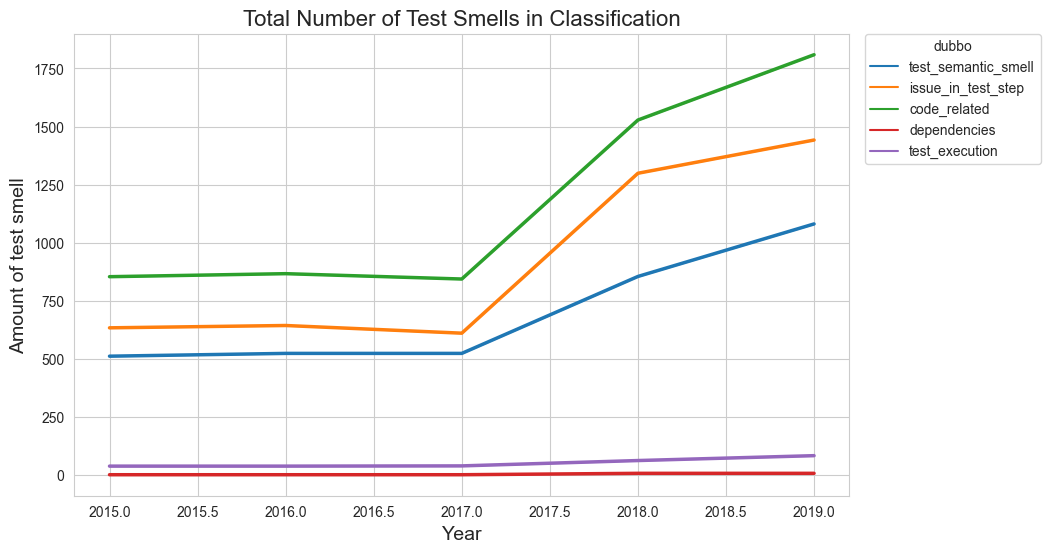

In [65]:
# create line chart, test smells
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=classification_all.set_index('Year'),x='Year', y='Total_Of_Test_Smell',hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='dubbo')
plt.title('Total Number of Test Smells in Classification', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of test smell', fontsize=14)
plt.show()

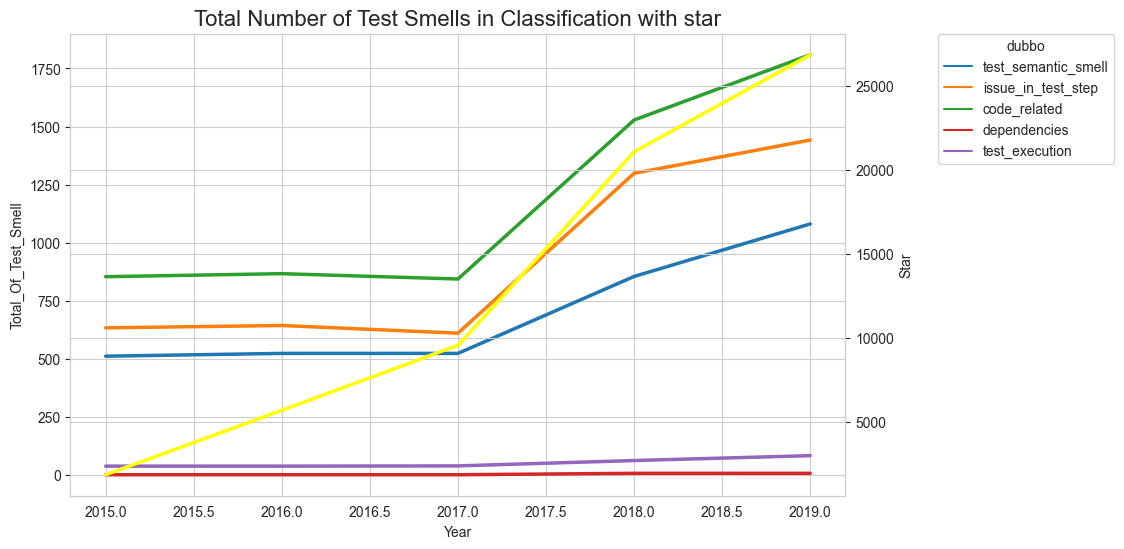

In [66]:
# create line chart, test smells with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=classification_all.set_index('Year'),x='Year', y='Total_Of_Test_Smell',hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0, title='dubbo')
ax2 = ax1.twinx()
sns.lineplot(data=classification_all.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='yellow')
plt.title('Total Number of Test Smells in Classification with star', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.show()

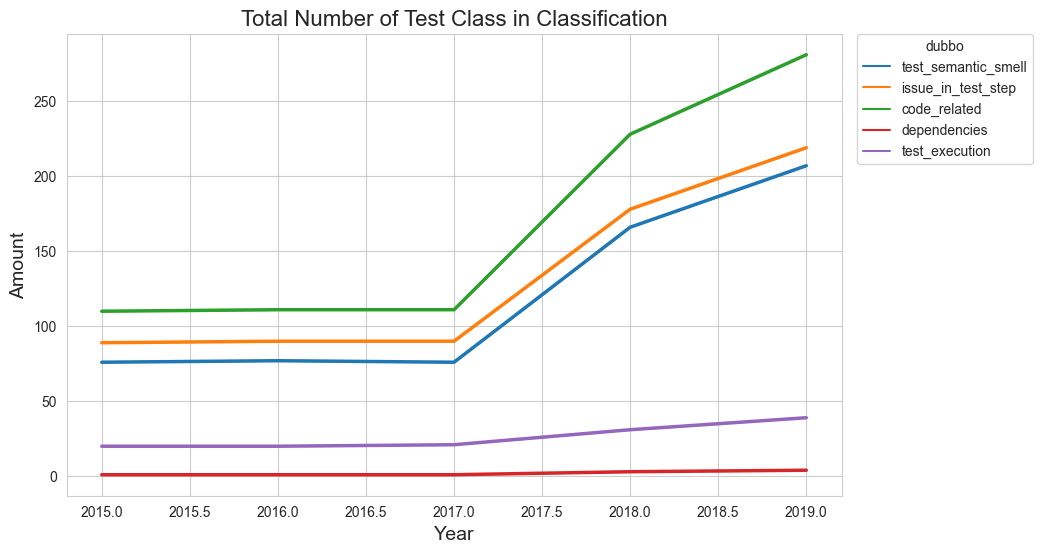

In [67]:
# create line chart, test class
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=classification_all.set_index('Year'), x='Year', y='Total_Of_Test_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False,)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='dubbo')
plt.title('Total Number of Test Class in Classification', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

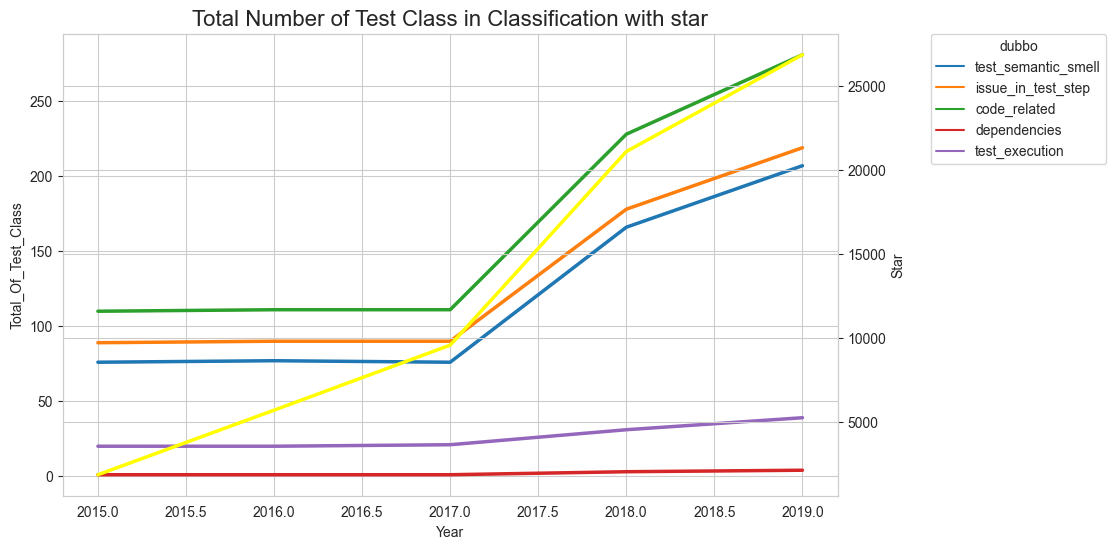

In [68]:
# create line chart, test class with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=classification_all.set_index('Year'), x='Year', y='Total_Of_Test_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False,)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0, title='dubbo')
ax2 = ax1.twinx()
sns.lineplot(data=classification_all.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='yellow')
plt.title('Total Number of Test Class in Classification with star', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.show()

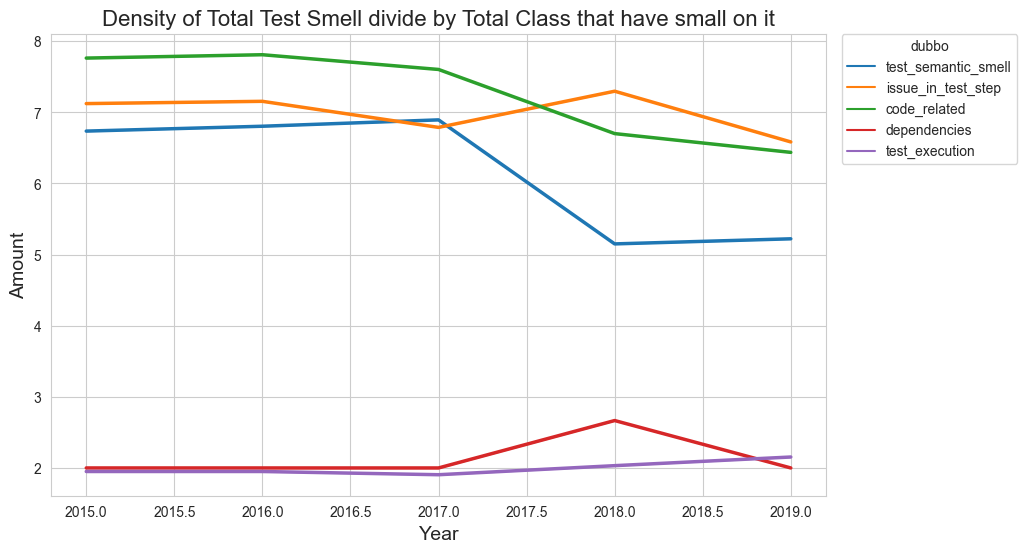

In [69]:
# create line chart, density smells/class
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=classification_all_with_density.set_index('Year'),x='Year', y='Density_TestSmellTotal_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='dubbo')
plt.title('Density of Total Test Smell divide by Total Class that have small on it', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

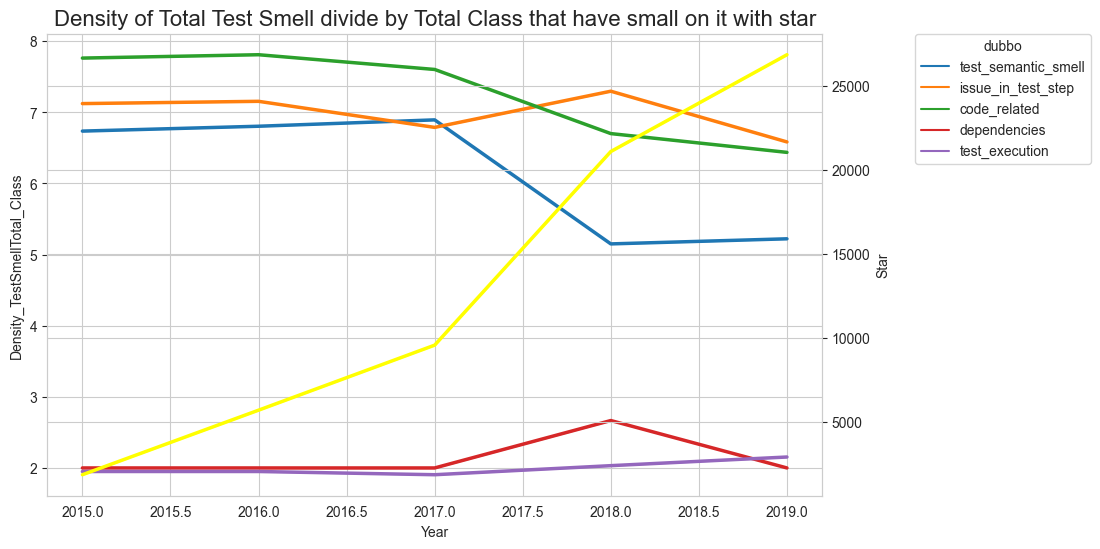

In [70]:
# create line chart, density smells/class with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=classification_all_with_density.set_index('Year'),x='Year', y='Density_TestSmellTotal_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0, title='dubbo')
ax2 = ax1.twinx()
sns.lineplot(data=classification_all.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='yellow')
plt.title('Density of Total Test Smell divide by Total Class that have small on it with star', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.show()

In [71]:
classification_all_pct_ch = classification_all
classification_all_pct_ch.info()
#Growth rate test class change in year
classification_all_pct_year_class = classification_all_pct_ch.sort_values(['Test_Smell_Classification_Type','Year']).reset_index(drop=True)
classification_all_pct_year_class['pct'] = classification_all_pct_year_class.groupby('Test_Smell_Classification_Type', sort=False)['Total_Of_Test_Class'].apply(lambda x: x.pct_change()*100).to_numpy()
classification_all_pct_year_class = classification_all_pct_year_class.loc[:,['Test_Smell_Classification_Type','Year','Total_Of_Test_Class','pct']]
classification_all_pct_year_class

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Test_Smell_Classification_Type  90 non-null     object 
 1   Test_Smell                      90 non-null     object 
 2   Number_Of_Test_Class            90 non-null     object 
 3   Total_Of_Test_Class             90 non-null     int64  
 4   List_Of_Test_Class              90 non-null     object 
 5   Number_Of_Test_Smell            90 non-null     object 
 6   Total_Of_Test_Smell             90 non-null     int64  
 7   Year                            90 non-null     int64  
 8   Star                            90 non-null     int64  
 9   Density_TestSmellTotal_Class    90 non-null     float64
dtypes: float64(1), int64(4), object(5)
memory usage: 7.7+ KB


Test_Smell_Classification_Type  Year  Total_Of_Test_Class        pct
0                    code_related  2015                  110        NaN
1                    code_related  2015                  110   0.000000
2                    code_related  2015                  110   0.000000
3                    code_related  2015                  110   0.000000
4                    code_related  2016                  111   0.909091
..                            ...   ...                  ...        ...
85            test_semantic_smell  2018                  166   0.000000
86            test_semantic_smell  2018                  166   0.000000
87            test_semantic_smell  2019                  207  24.698795
88            test_semantic_smell  2019                  207   0.000000
89            test_semantic_smell  2019                  207   0.000000

[90 rows x 4 columns]

In [72]:
#Growth rate test smell change in year
classification_all_pct_year_smell = classification_all_pct_ch.sort_values(['Test_Smell_Classification_Type','Year']).reset_index(drop=True)
classification_all_pct_year_smell['pct'] = classification_all_pct_year_smell.groupby('Test_Smell_Classification_Type', sort=False)['Total_Of_Test_Smell'].apply(lambda x: x.pct_change()*100).to_numpy()
classification_all_pct_year_smell = classification_all_pct_year_smell.loc[:,['Test_Smell_Classification_Type','Year','Total_Of_Test_Smell','pct']]
classification_all_pct_year_smell

Test_Smell_Classification_Type  Year  Total_Of_Test_Smell        pct
0                    code_related  2015                  854        NaN
1                    code_related  2015                  854   0.000000
2                    code_related  2015                  854   0.000000
3                    code_related  2015                  854   0.000000
4                    code_related  2016                  867   1.522248
..                            ...   ...                  ...        ...
85            test_semantic_smell  2018                  855   0.000000
86            test_semantic_smell  2018                  855   0.000000
87            test_semantic_smell  2019                 1081  26.432749
88            test_semantic_smell  2019                 1081   0.000000
89            test_semantic_smell  2019                 1081   0.000000

[90 rows x 4 columns]

In [16]:
# test_hive = dubbo_2015.dropna(axis='columns')
# df = test_hive.loc[:, 'NumberOfMethods':'Dependent Test']
# total =  df.sum()
# total = pd.Series(total)
# frame = {'Amount': total, 'Year': 2015}
# result = pd.DataFrame(frame)
# result.reset_index(inplace=True)
# result = result.rename(columns={'index': 'Test_Smell'}, errors='raise')
# result

In [17]:
def total_test_smell(dataframe : pd.DataFrame, year):
    dataframe = dataframe.dropna(axis='columns')
    df = dataframe.loc[:, 'Assertion Roulette':'Dependent Test']
    total =  df.sum()
    total = pd.Series(total)
    frame = {'Amount': total, 'Year': year}
    result = pd.DataFrame(frame)
    result.reset_index(inplace=True)
    result = result.rename(columns={'index': 'Test_Smell_Type'}, errors='raise')
    result['Test_Smell_Total'] = result['Amount'].sum()
    return result

In [18]:
def total_test_method(dataframe : pd.DataFrame, year):
    dataframe = dataframe.dropna(axis='columns')
    df = dataframe.loc[:, 'NumberOfMethods':'Dependent Test']
    total =  df.sum()
    total = pd.Series(total)
    frame = {'Amount': total, 'Year': year}
    result = pd.DataFrame(frame)
    result.reset_index(inplace=True)
    result = result.rename(columns={'index': 'Test_Smell_Type'}, errors='raise')
    return result

In [19]:
# testsmell2015 = total_test_method(dubbo_2015, 2015)
# testsmell2016 = total_test_method(dubbo_2016, 2016)
# testsmell2017 = total_test_method(dubbo_2017, 2017)
# testsmell2018 = total_test_method(dubbo_2018, 2018)
# testsmell2019 = total_test_method(dubbo_2019, 2019)
# all = [testsmell2015,testsmell2016,testsmell2017,testsmell2018,testsmell2019]
# df = pd.concat(all, axis=0)
# df = df.loc[df['Test_Smell_Type'] == 'NumberOfMethods']
# df = df.rename(columns={'Test_Smell_Type': 'Test_Method', 'Amount': 'Test_Method_Total'})
# df = df.drop(['Test_Method'], axis=1)
# df
# sns.barplot(x='Year', y='Amount', hue='Test_Smell_Type', data=df)

In [21]:
# total_dubbo2015 = total_test_smell(dubbo_2015, 2015)
# total_dubbo2016 = total_test_smell(dubbo_2016, 2016)
# total_dubbo2017 = total_test_smell(dubbo_2017, 2017)
# total_dubbo2018 = total_test_smell(dubbo_2018, 2018)
# total_dubbo2019 = total_test_smell(dubbo_2019, 2019)
# all_list_hive = [total_dubbo2015,total_dubbo2016,total_dubbo2017,total_dubbo2018,total_dubbo2019]
# all_list_hive_total = pd.concat(all_list_hive, axis=0)
# all_list_hive_total = all_list_hive_total.reset_index(drop=True)
# all_list_hive_total = all_list_hive_total.merge(df, on='Year', how='left')
# all_list_hive_total
# all_list_hive_total = all_list_hive_total.rename({0: '2015',1: '2016',2: '2017',3: '2018',4: '2019'}, axis='columns', errors='raise')
# all_list_hive_total


Test_Smell_Classification_Type                   Test_Smell  \
0             test_semantic_smell           Assertion Roulette   
1             test_semantic_smell       Conditional Test Logic   
2             test_semantic_smell             Duplicate Assert   
3             test_semantic_smell  Exception Catching Throwing   
4             test_semantic_smell              General Fixture   
..                            ...                          ...   
85            test_semantic_smell                Mystery Guest   
86            test_semantic_smell            Resource Optimism   
87            test_semantic_smell           Sensitive Equality   
88            test_semantic_smell                  Sleepy Test   
89            test_semantic_smell           Sensitive Equality   

   Number_Of_Test_Class  Total_Of_Test_Class  \
0                    68                   76   
1                    30                   76   
2                    34                   76   
3                    80                   89   
4                    11                   89   
..                  ...                  ...   
85                    3                    4   
86                    4                    4   
87                   18                   39   
88                   22                   39   
89                   18                   39   

                                   List_Of_Test_Class Number_Of_Test_Smell  \
0   [MulticastRegistryTest.java, ZookeeperRegistry...                  359   
1   [MulticastRegistryTest.java, PerformanceRegist...                   76   
2   [RegistryDirectoryTest.java, StatItemTest.java...                   77   
3   [AbstractRegistryFactoryTest.java, Performance...                  494   
4   [ChangeTelnetHandlerTest.java, ListTelnetHandl...                   77   
..                                                ...                  ...   
85  [LoggerFactoryTest.java, FileSystemDynamicConf...                    3   
86  [LoggerFactoryTest.java, FileSystemDynamicConf...                    5   
87  [GenericServiceTest.java, ServiceDiscoveryTest...                   26   
88  [ConsulRegistryTest.java, EnumBak.java, PortTe...                   32   
89  [GenericServiceTest.java, ServiceDiscoveryTest...                   26   

    Total_Of_Test_Smell  Year   Star  
0                   512  2015   1860  
1                   512  2015   1860  
2                   512  2015   1860  
3                   634  2015   1860  
4                   634  2015   1860  
..                  ...   ...    ...  
85                    8  2019  26850  
86                    8  2019  26850  
87                   84  2019  26850  
88                   84  2019  26850  
89                   84  2019  26850  

[90 rows x 9 columns]

In [43]:
all_list_hive_total['Density_test_smell'] = (all_list_hive_total['Test_Smell_Total']/all_list_hive_total['Test_Method_Total'])
all_list_hive_total['Density_each_test_smell'] = (all_list_hive_total['Amount']/all_list_hive_total['Test_Method_Total'])
all_list_hive_total
all_list_hive_total.to_csv('/Users/Jumma/github_repo/github_api_extractor/resources/dataframe/dubbo.csv')


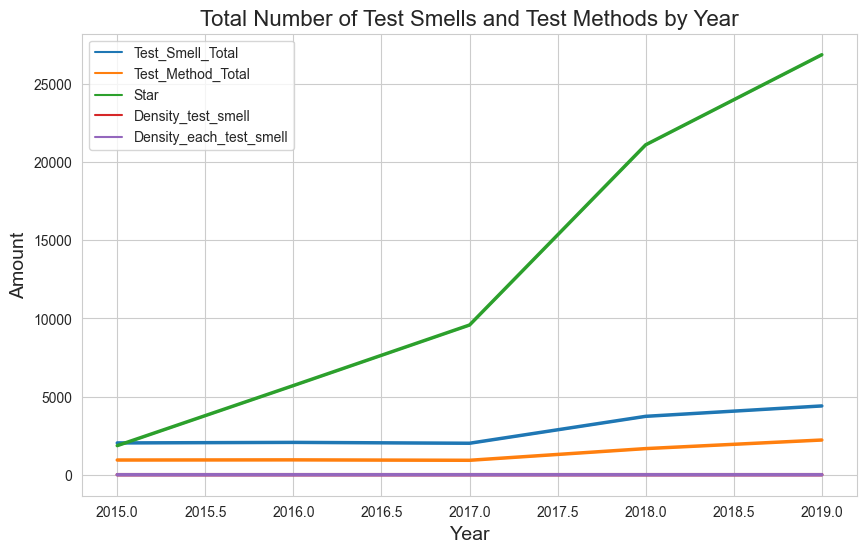

In [44]:
# create line chart
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=all_list_hive_total.set_index('Year').drop(['Amount'], axis=1), linewidth=2.5, dashes=False)
plt.title('Total Number of Test Smells and Test Methods by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

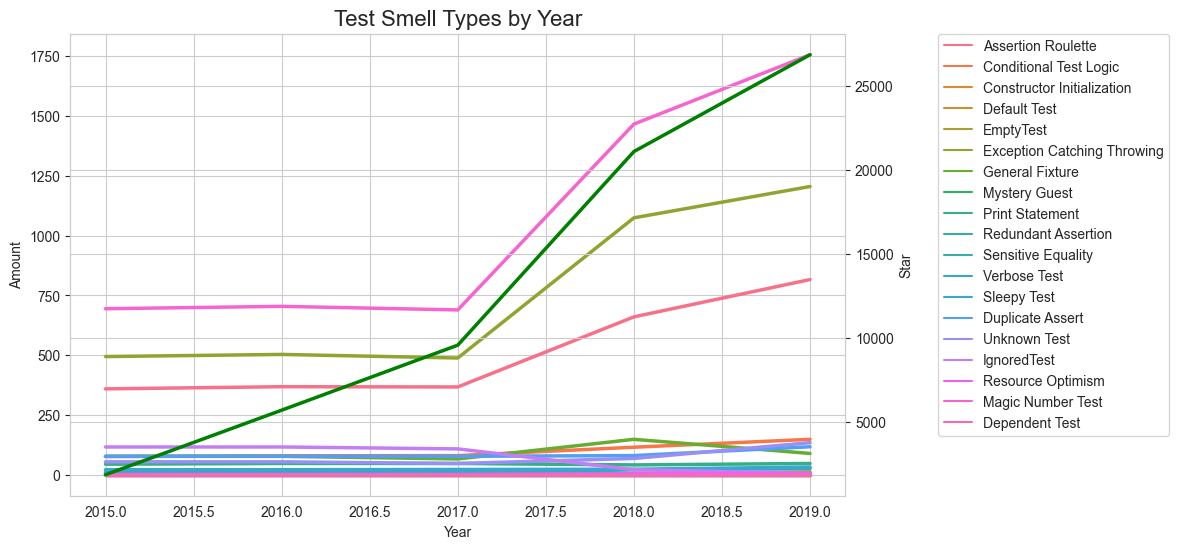

In [45]:
# create line chart with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=all_list_hive_total.set_index('Year'), linewidth=2.5,x='Year',y='Amount',hue='Test_Smell_Type', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
plt.title('Test Smell Types by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
# plt.ylabel('Amount', fontsize=14)


plt.show()

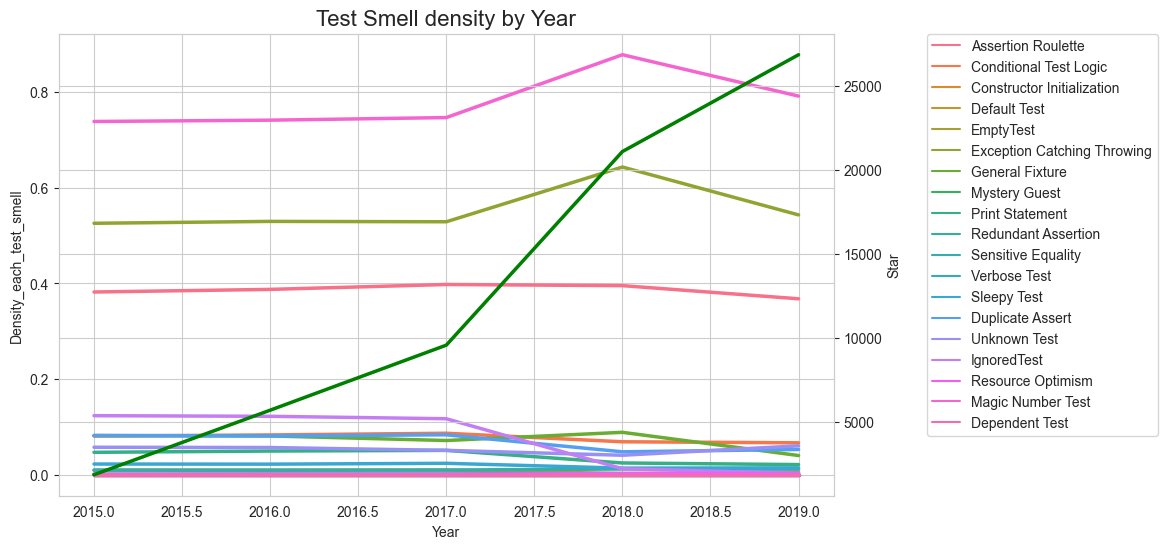

In [46]:
# create line chart with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=all_list_hive_total.set_index('Year'), linewidth=2.5 ,x='Year', y='Density_each_test_smell',hue='Test_Smell_Type', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
plt.title('Test Smell density by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
# plt.ylabel('Amount', fontsize=14)

plt.show()

In [47]:
test_semantic_smell = ['Assertion Roulette','Conditional Test Logic','Duplicate Assert', 'Eager Test', 'Lazy Test']
test_semantic_smell = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(test_semantic_smell)) == False]
test_semantic_smell['Classification'] = 'test semantic'
temp = test_semantic_smell.groupby('Year')['Amount'].sum()
test_semantic_smell = test_semantic_smell.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
issue_in_test_step = ['Exception Handling', 'General Fixture', 'Empty Test', 'Redundant Assertion', 'Unknown Test']
issue_in_test_step = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(issue_in_test_step)) == False]
issue_in_test_step['Classification'] = 'issue in test step'
temp = issue_in_test_step.groupby('Year')['Amount'].sum()
issue_in_test_step = issue_in_test_step.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
code_related = ['Magic Number Test', 'Redundant Print', 'Ignored Test']
code_related = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(code_related)) == False]
code_related['Classification'] = 'code related'
temp = code_related.groupby('Year')['Amount'].sum()
code_related = code_related.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
test_execution = ['Sensitive Equality', 'Sleepy Test']
test_execution = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(test_execution)) == False]
test_execution['Classification'] = 'test execution'
temp = test_execution.groupby('Year')['Amount'].sum()
test_execution = test_execution.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
dependencies = ['Mystery Guest', 'Resource Optimism']
dependencies = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(dependencies)) == False]
dependencies['Classification'] = 'dependencies'
temp = dependencies.groupby('Year')['Amount'].sum()
dependencies = dependencies.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
list_Classification = [test_semantic_smell, issue_in_test_step, code_related, test_execution, dependencies]
list_Classification = pd.concat(list_Classification)
list_Classification = list_Classification.reset_index(drop=True)
list_Classification
# list_classification = ['test semantic', 'issue in test step', 'code related', 'test execution', 'dependencies']

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/2315044863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_semantic_smell['Classification'] = 'test semantic'
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/2315044863.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_in_test_step['Classification'] = 'issue in test step'
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/2315044863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a co

Test_Smell_Type  Amount  Year  Test_Smell_Total  Test_Method_Total  \
0       Assertion Roulette     359  2015              2032                940   
1   Conditional Test Logic      76  2015              2032                940   
2         Duplicate Assert      77  2015              2032                940   
3       Assertion Roulette     368  2016              2067                950   
4   Conditional Test Logic      79  2016              2067                950   
5         Duplicate Assert      77  2016              2067                950   
6       Assertion Roulette     367  2017              2012                923   
7   Conditional Test Logic      80  2017              2012                923   
8         Duplicate Assert      77  2017              2012                923   
9       Assertion Roulette     660  2018              3733               1670   
10  Conditional Test Logic     115  2018              3733               1670   
11        Duplicate Assert      80  2018              3733               1670   
12      Assertion Roulette     816  2019              4398               2219   
13  Conditional Test Logic     148  2019              4398               2219   
14        Duplicate Assert     117  2019              4398               2219   
15         General Fixture      77  2015              2032                940   
16     Redundant Assertion       0  2015              2032                940   
17            Unknown Test      54  2015              2032                940   
18         General Fixture      77  2016              2067                950   
19     Redundant Assertion       1  2016              2067                950   
20            Unknown Test      54  2016              2067                950   
21         General Fixture      66  2017              2012                923   
22     Redundant Assertion       1  2017              2012                923   
23            Unknown Test      47  2017              2012                923   
24         General Fixture     148  2018              3733               1670   
25     Redundant Assertion       2  2018              3733               1670   
26            Unknown Test      68  2018              3733               1670   
27         General Fixture      89  2019              4398               2219   
28     Redundant Assertion       2  2019              4398               2219   
29            Unknown Test     134  2019              4398               2219   
30       Magic Number Test     694  2015              2032                940   
31       Magic Number Test     704  2016              2067                950   
32       Magic Number Test     689  2017              2012                923   
33       Magic Number Test    1466  2018              3733               1670   
34       Magic Number Test    1756  2019              4398               2219   
35      Sensitive Equality       9  2015              2032                940   
36             Sleepy Test      21  2015              2032                940   
37      Sensitive Equality       9  2016              2067                950   
38             Sleepy Test      21  2016              2067                950   
39      Sensitive Equality       9  2017              2012                923   
40             Sleepy Test      22  2017              2012                923   
41      Sensitive Equality      20  2018              3733               1670   
42             Sleepy Test      23  2018              3733               1670   
43      Sensitive Equality      26  2019              4398               2219   
44             Sleepy Test      32  2019              4398               2219   
45           Mystery Guest       1  2015              2032                940   
46       Resource Optimism       1  2015              2032                940   
47           Mystery Guest       1  2016              2067                950   
48       Resource Optimism       1  2016  

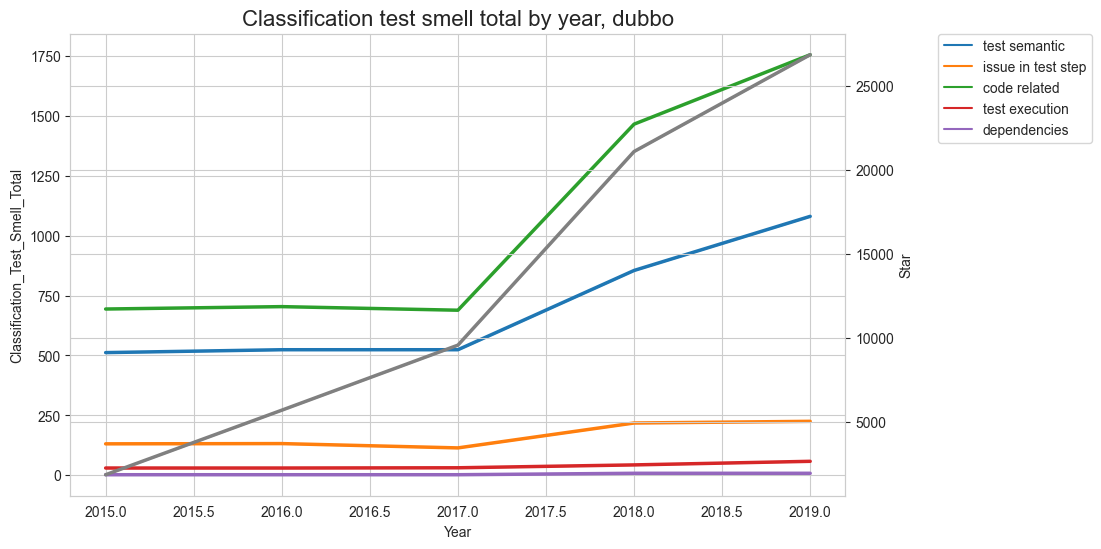

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=list_Classification.set_index('Year'), linewidth=2.5 ,x='Year', y='Classification_Test_Smell_Total' ,hue='Classification', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='gray')
plt.title('Classification test smell total by year, dubbo', fontsize=16)
plt.xlabel('Year', fontsize=14)
# plt.ylabel('Amount', fontsize=14)

plt.show()

### Classification by Vahid Garousi 2018

In [49]:
test_semantic_smell = ['Assertion Roulette','Conditional Test Logic','Duplicate Assert', 'Eager Test', 'Lazy Test']
test_semantic_smell = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(test_semantic_smell)) == False]
issue_in_test_step = ['Exception Handling', 'General Fixture']
issue_in_test_step = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(issue_in_test_step)) == False]
code_related = ['Magic Number Test', 'Redundant Print', 'Redundant Assertion']
code_related = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(code_related)) == False]
test_execution = ['Sensitive Equality', 'Sleepy Test']
test_execution = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(test_execution)) == False]
listClassification = [test_semantic_smell, issue_in_test_step, code_related, test_execution]

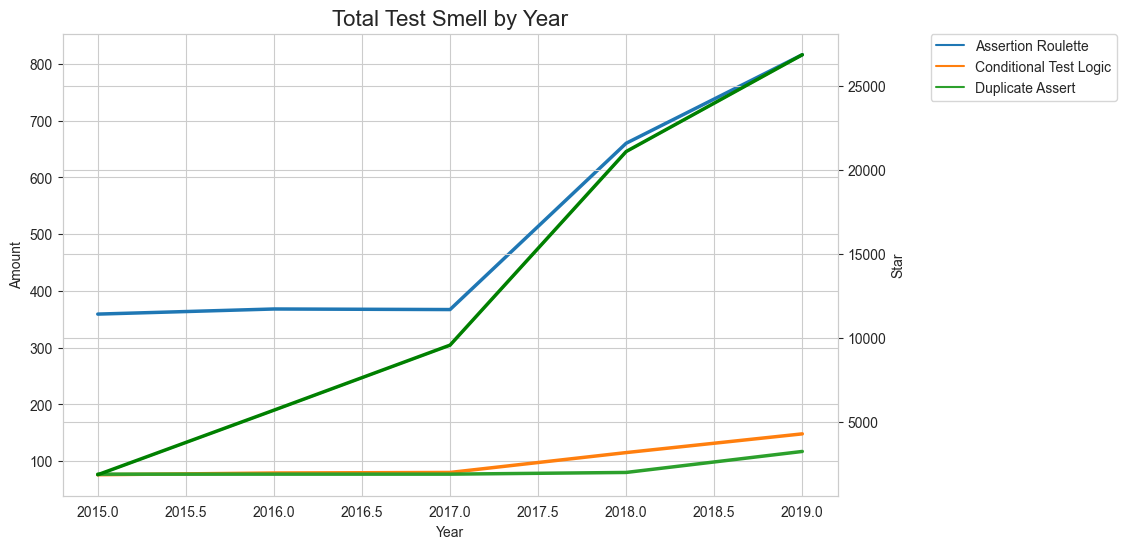

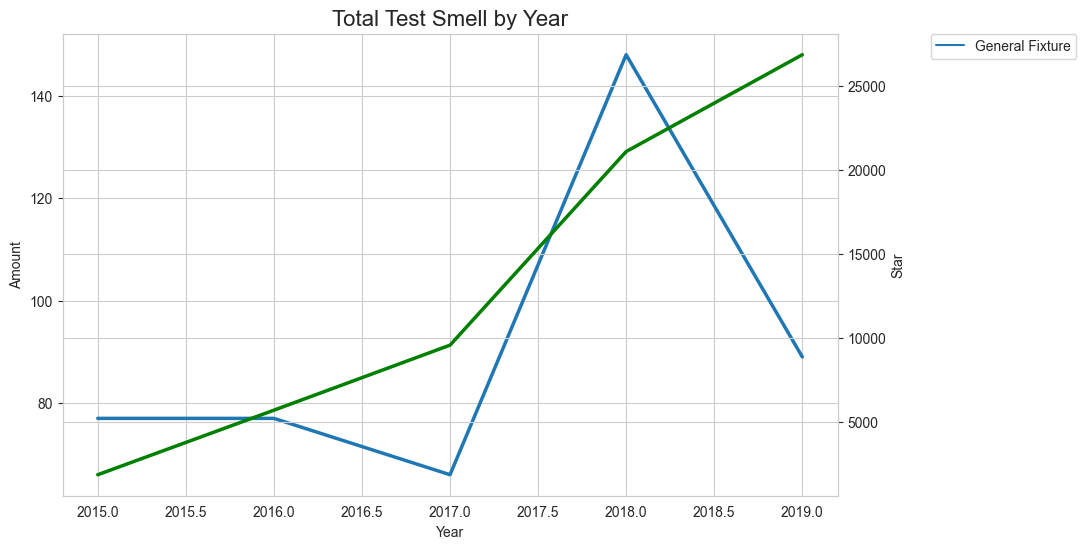

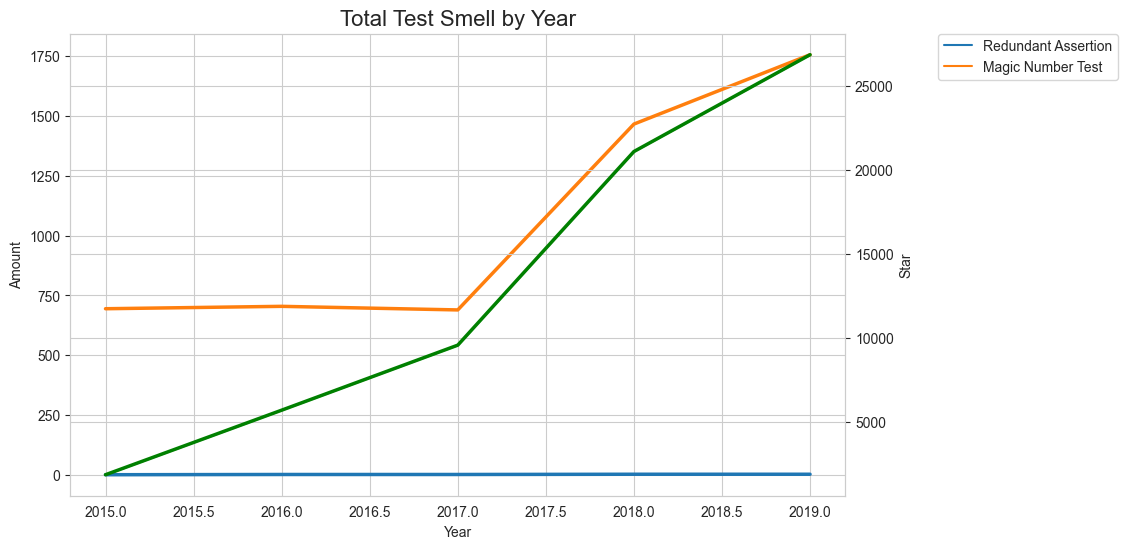

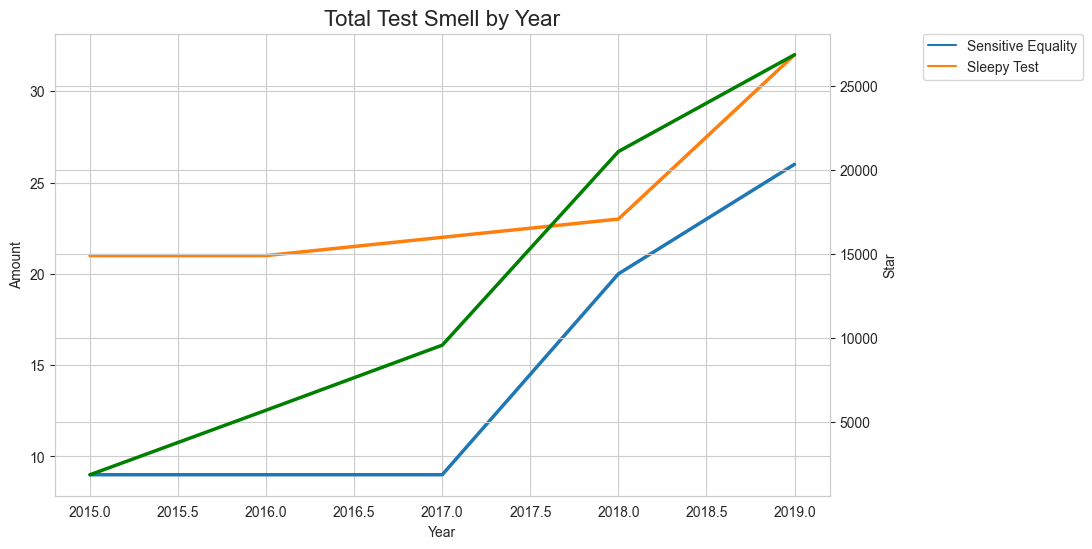

In [50]:
sns.set_style("whitegrid")

for a in listClassification:
    plt.figure(figsize=(10,6))
    ax1 = sns.lineplot(data=a.set_index('Year'), linewidth=2.5 ,x='Year', y='Amount',hue='Test_Smell_Type', dashes=False)
    plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
    ax2 = ax1.twinx()
    sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
    plt.title('Total Test Smell by Year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    # plt.ylabel('Amount', fontsize=14)
    plt.show()

In [51]:
most_discuss = ['Assertion Roulette', 'Eager Test', 'General Fixture', 'Mystery Guest', 'Redundant Print', 'Redundant Assertion']
most_discuss = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(most_discuss)) == False]

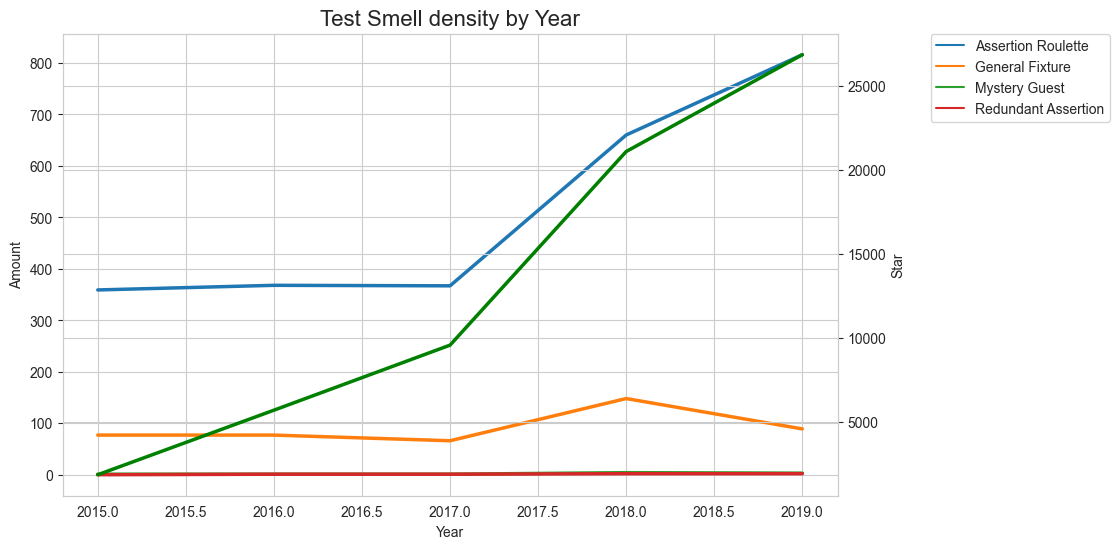

In [52]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=most_discuss.set_index('Year'), linewidth=2.5 ,x='Year', y='Amount',hue='Test_Smell_Type', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
plt.title('Test Smell density by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
# plt.ylabel('Amount', fontsize=14)
plt.show()

## Most discuss until 2018

In [53]:
most_discuss = ['Assertion Roulette', 'Eager Test', 'General Fixture', 'Mystery Guest', 'Redundant Print', 'Redundant Assertion']
most_discuss = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(most_discuss)) == False]

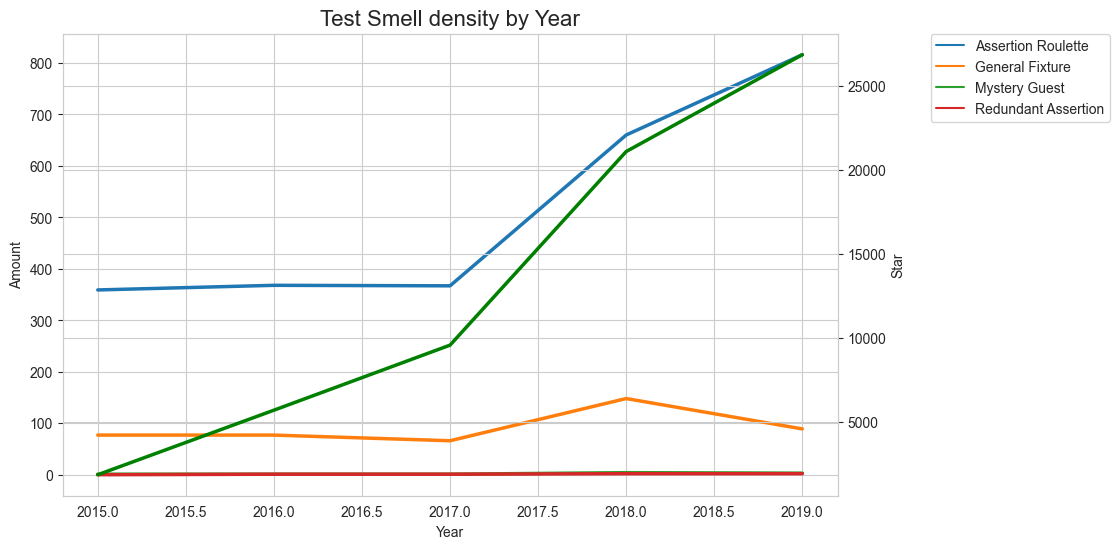

In [54]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=most_discuss.set_index('Year'), linewidth=2.5 ,x='Year', y='Amount',hue='Test_Smell_Type', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
plt.title('Test Smell density by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
# plt.ylabel('Amount', fontsize=14)
plt.show()

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/3762903622.py:6: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x='Test_Smell_Total', y='Test_Method_Total', data=all_list_hive_total, cmap="Reds", shade=True, shade_lowest=False)
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/3762903622.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Test_Smell_Total', y='Test_Method_Total', data=all_list_hive_total, cmap="Reds", shade=True, shade_lowest=False)


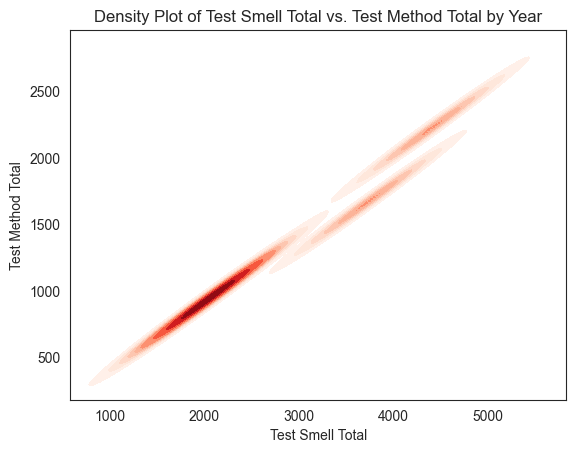

In [55]:

# Create a scatter plot with Test_Smell_Total and Test_Method_Total
sns.set_style('white')
sns.scatterplot(x='Test_Smell_Total', y='Test_Method_Total', data=all_list_hive_total, alpha=0.5)

# Create a heatmap to show density in each year
sns.kdeplot(x='Test_Smell_Total', y='Test_Method_Total', data=all_list_hive_total, cmap="Reds", shade=True, shade_lowest=False)

# Add labels and title
plt.xlabel('Test Smell Total')
plt.ylabel('Test Method Total')
plt.title('Density Plot of Test Smell Total vs. Test Method Total by Year')

plt.show()

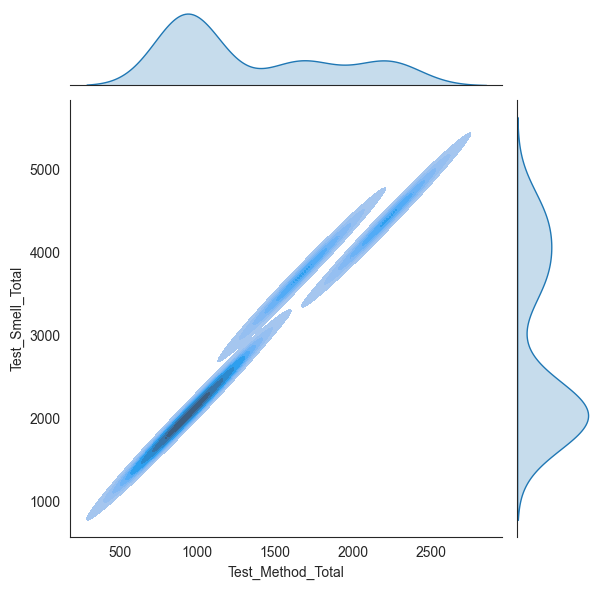

In [56]:
sns.jointplot(data=all_list_hive_total, x="Test_Method_Total", y="Test_Smell_Total", kind="kde", fill=True)

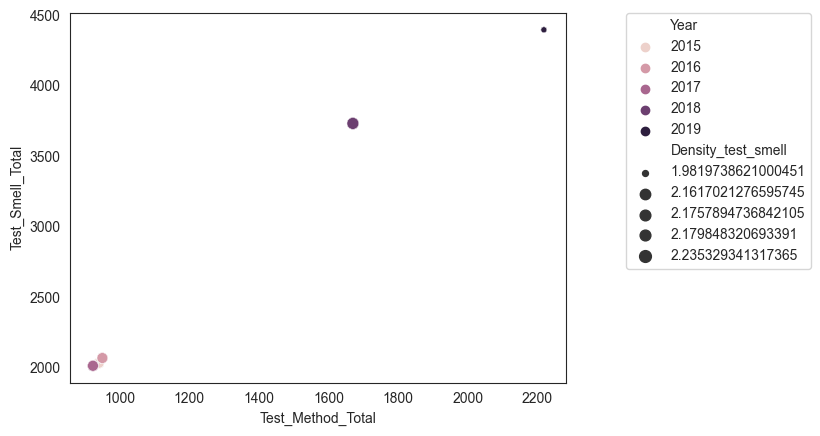

In [57]:
sns.scatterplot(data=all_list_hive_total, x='Test_Method_Total', y='Test_Smell_Total', size='Density_test_smell', hue='Year')
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)


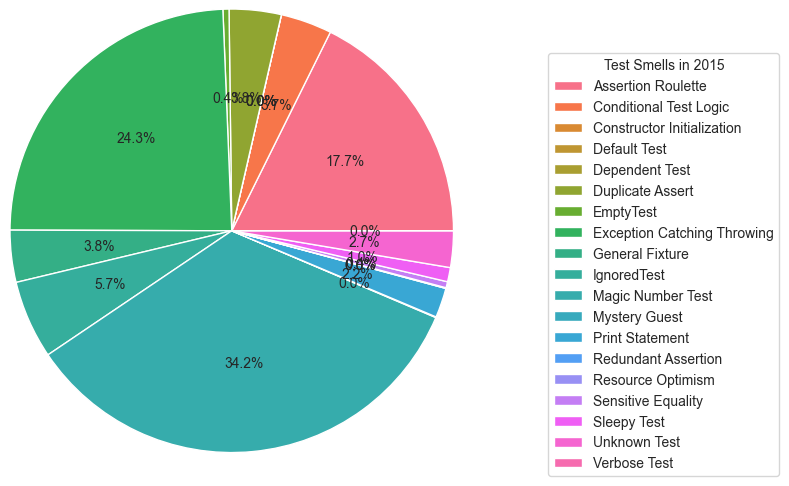

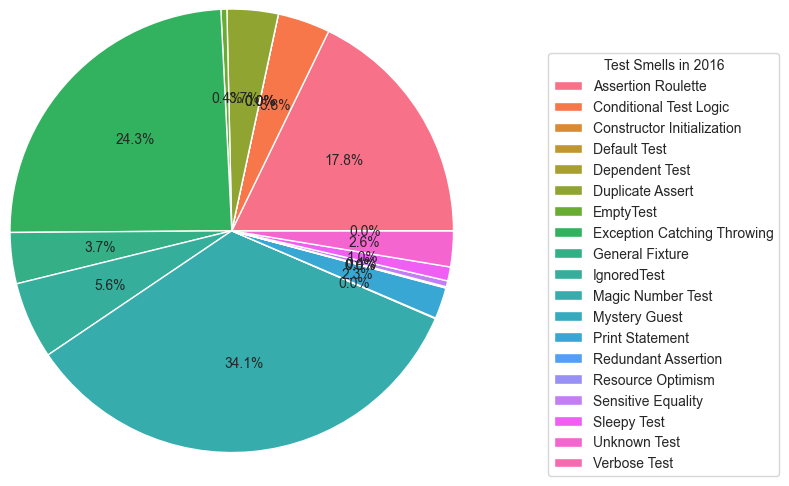

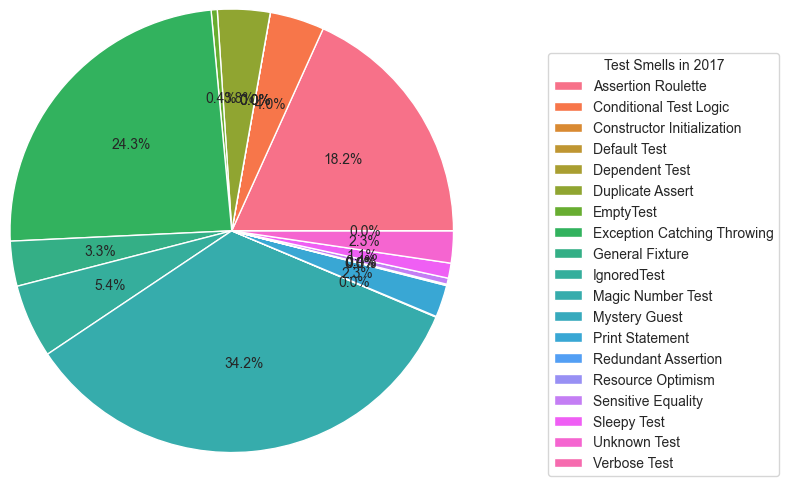

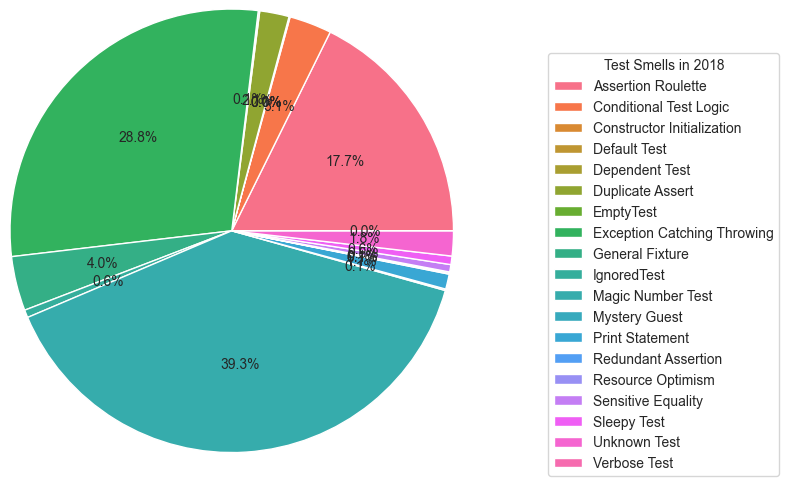

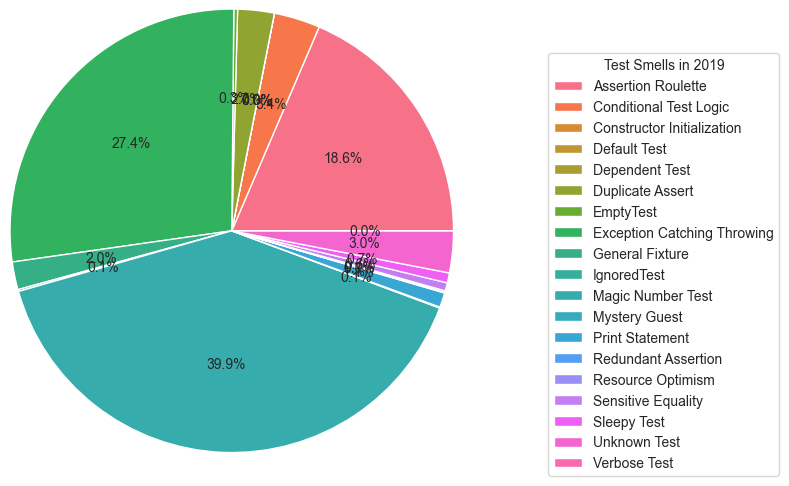

In [58]:
# Group the data by Test Smell Type and sum the Amount column
grouped = all_list_hive_total.groupby('Year')

for year, data in grouped:
    # Get the sum of each test smell type for the current year
    sums = data.groupby('Test_Smell_Type')['Amount'].sum()

    # Create the pie chart
    colors = sns.color_palette("husl", 19)
    plt.pie(sums, autopct='%1.1f%%', radius=1.5, colors=colors)
    plt.legend(sums.index, loc="upper right",bbox_to_anchor=(2, 1), title=f'Test Smells in {year}')
    plt.show()


In [59]:
def test_smell_show_inEachClass(column):
    plt.figure(figsize=(10,5))
    g = sns.scatterplot(data=dubbo_2015, x="TestClass", y=column)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

In [60]:
pivot_table = pd.pivot_table(all_list_hive_total, values='Amount', index=['Test_Smell_Type'], columns=['Year'], aggfunc='mean')
pivot_table

Year                         2015  2016  2017  2018  2019
Test_Smell_Type                                          
Assertion Roulette            359   368   367   660   816
Conditional Test Logic         76    79    80   115   148
Constructor Initialization      0     0     0     3     0
Default Test                    0     0     0     0     0
Dependent Test                  0     0     0     0     0
Duplicate Assert               77    77    77    80   117
EmptyTest                       9     9     9     4    12
Exception Catching Throwing   494   503   488  1074  1205
General Fixture                77    77    66   148    89
IgnoredTest                   116   116   108    21     6
Magic Number Test             694   704   689  1466  1756
Mystery Guest                   1     1     1     4     3
Print Statement                44    47    47    41    47
Redundant Assertion             0     1     1     2     2
Resource Optimism               1     1     1     4     5
Sensitive Equality              9     9     9    20    26
Sleepy Test                    21    21    22    23    32
Unknown Test                   54    54    47    68   134
Verbose Test                    0     0     0     0     0

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/1906124443.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


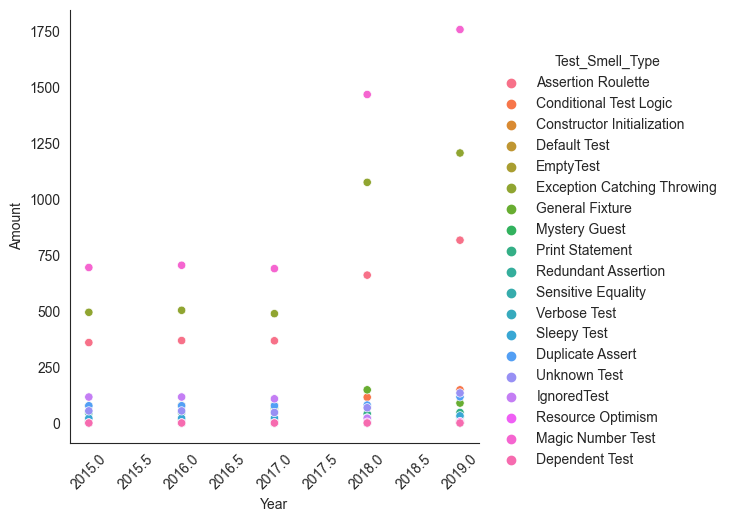

In [61]:
g = sns.pairplot(data=all_list_hive_total, hue='Test_Smell_Type', x_vars=['Year'], y_vars=['Amount'], height=5)
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


From graph pairplot above, You will see the Case that are always high is ***Magic Number*** and ***Exception Catching Throwing*** Seem like they won't try to fix those Test_Smell at all. At the hive project its seem like stable, but in the cassandar trend on those test smell is slightly high in each year(2018 look like they change all the code or migrate to use Junit5)

<AxesSubplot: xlabel='Year', ylabel='Test_Smell_Type'>

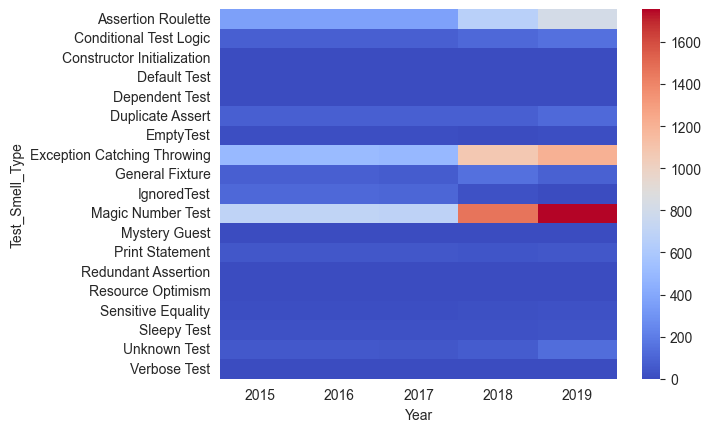

In [62]:
sns.heatmap(pivot_table, cmap='coolwarm')

For this heatmap we change the style of graph to investigate more trend of this data. **In Hive project**, You can see the test smell are not decrease from year to year at all, **same as the cassandar** too.

In [63]:
feature = ['NumberOfMethods', 'Assertion Roulette',
       'Conditional Test Logic', 'Constructor Initialization', 'Default Test',
       'EmptyTest', 'Exception Catching Throwing', 'General Fixture',
       'Mystery Guest', 'Print Statement', 'Redundant Assertion',
       'Sensitive Equality', 'Verbose Test', 'Sleepy Test', 'Eager Test',
       'Lazy Test', 'Duplicate Assert', 'Unknown Test', 'IgnoredTest',
       'Resource Optimism', 'Magic Number Test', 'Dependent Test']
list(enumerate(feature))

[(0, 'NumberOfMethods'),
 (1, 'Assertion Roulette'),
 (2, 'Conditional Test Logic'),
 (3, 'Constructor Initialization'),
 (4, 'Default Test'),
 (5, 'EmptyTest'),
 (6, 'Exception Catching Throwing'),
 (7, 'General Fixture'),
 (8, 'Mystery Guest'),
 (9, 'Print Statement'),
 (10, 'Redundant Assertion'),
 (11, 'Sensitive Equality'),
 (12, 'Verbose Test'),
 (13, 'Sleepy Test'),
 (14, 'Eager Test'),
 (15, 'Lazy Test'),
 (16, 'Duplicate Assert'),
 (17, 'Unknown Test'),
 (18, 'IgnoredTest'),
 (19, 'Resource Optimism'),
 (20, 'Magic Number Test'),
 (21, 'Dependent Test')]

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


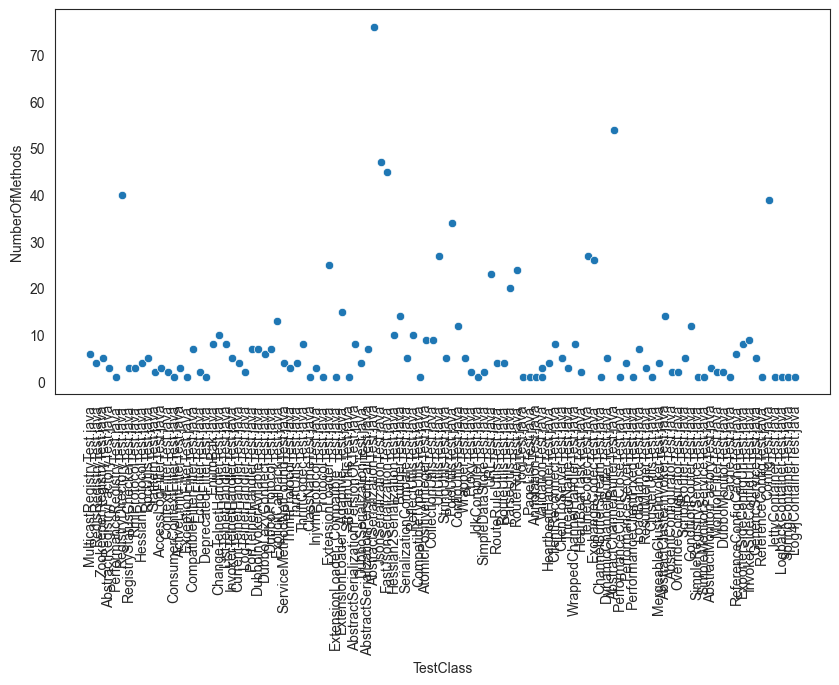

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


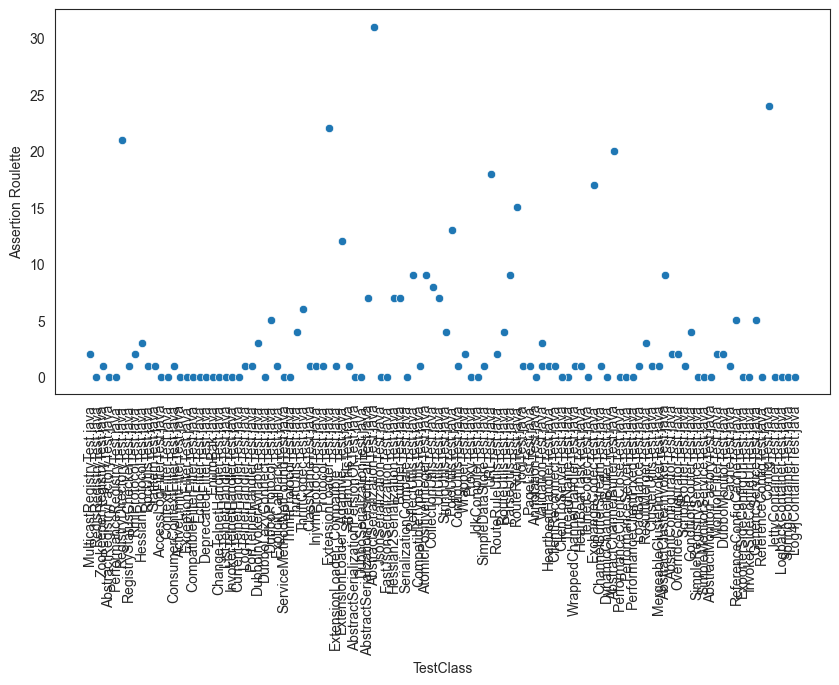

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


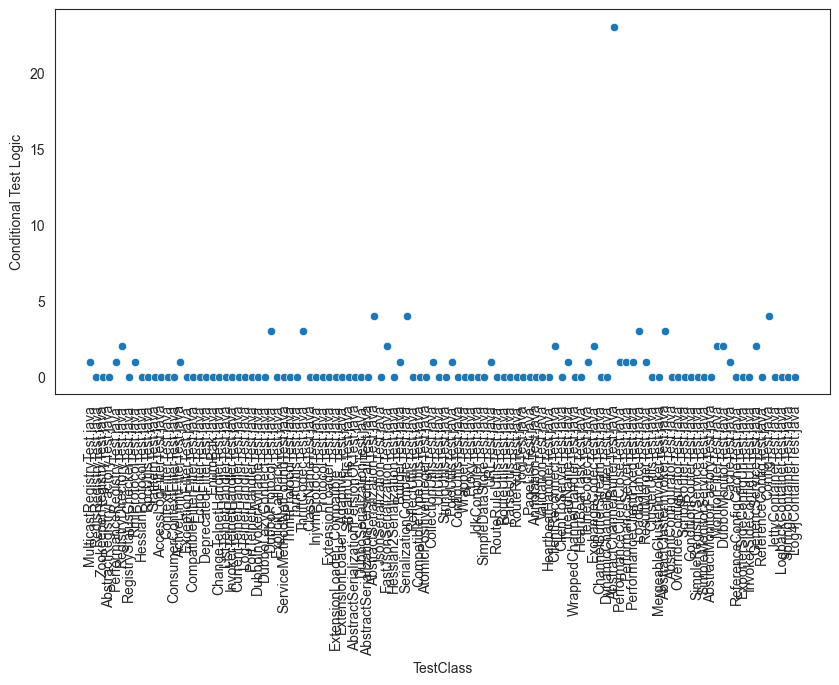

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


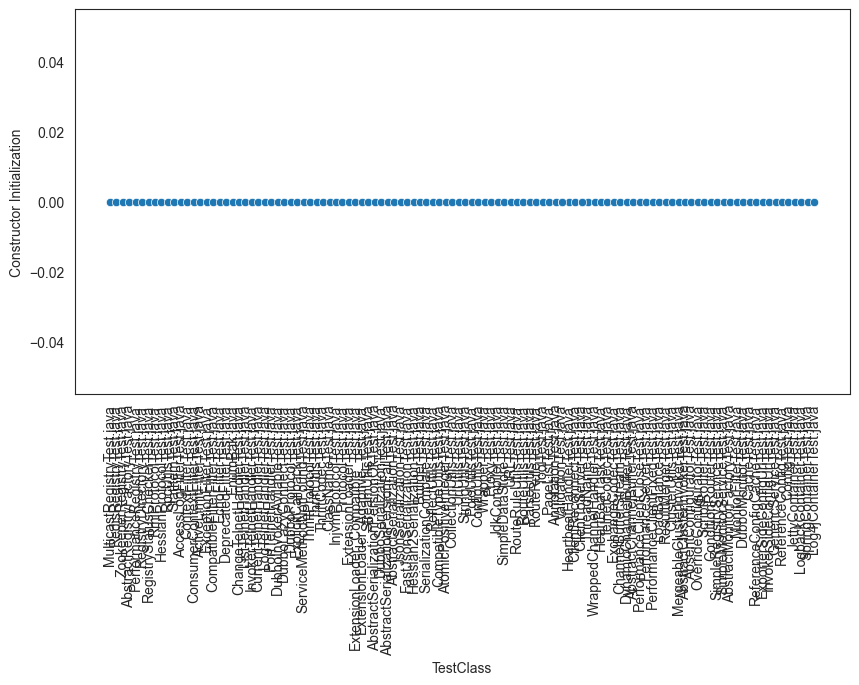

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


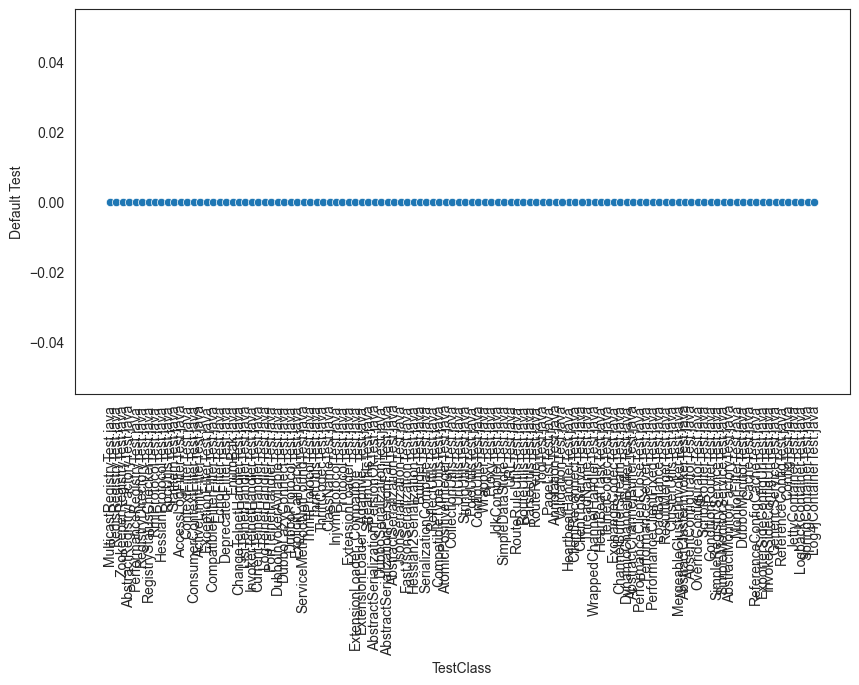

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


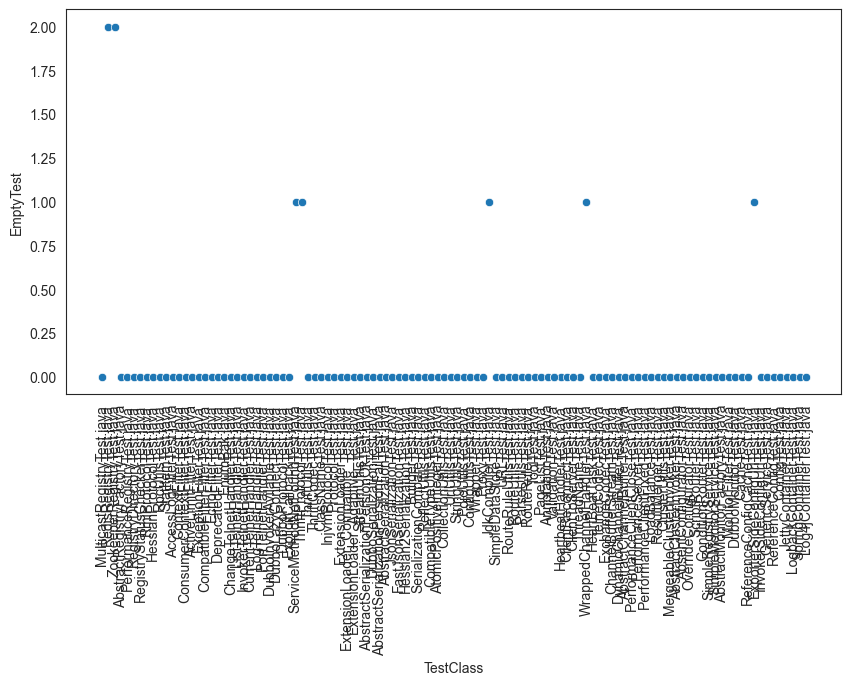

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


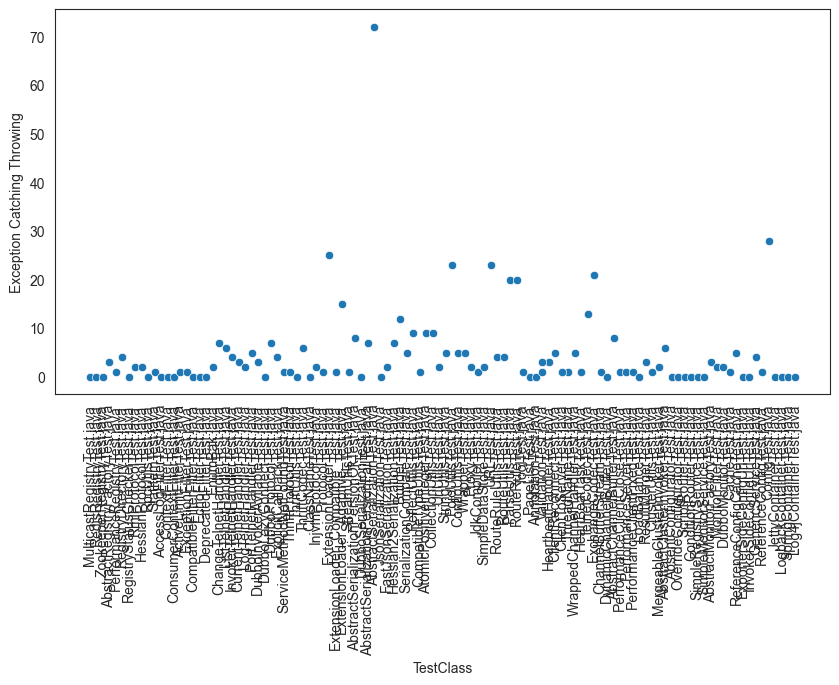

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


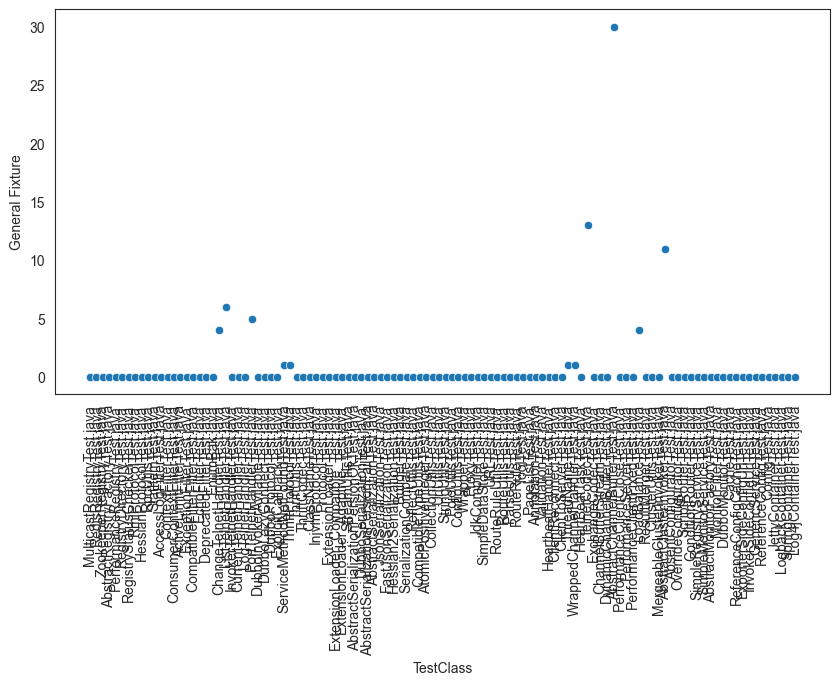

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


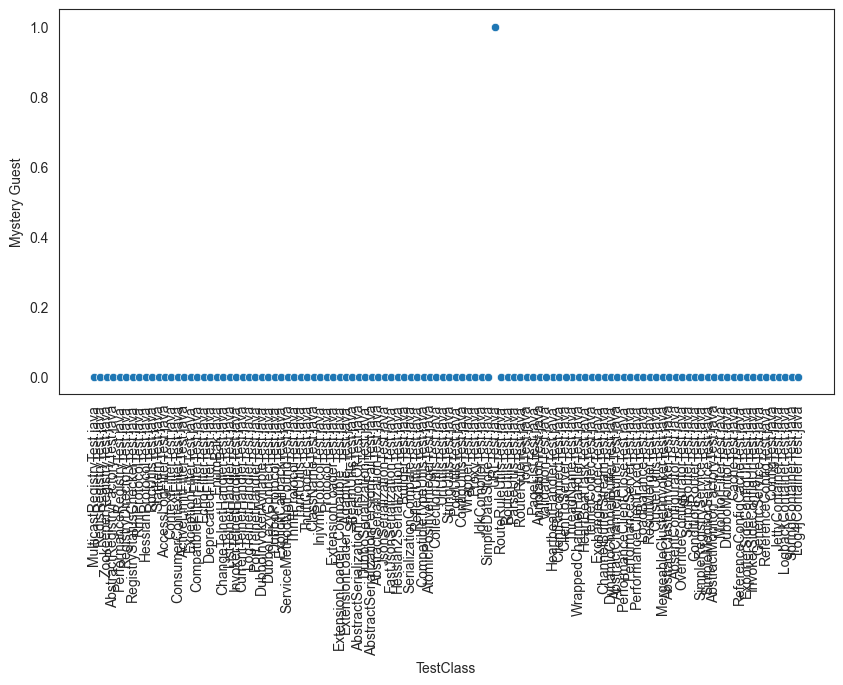

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


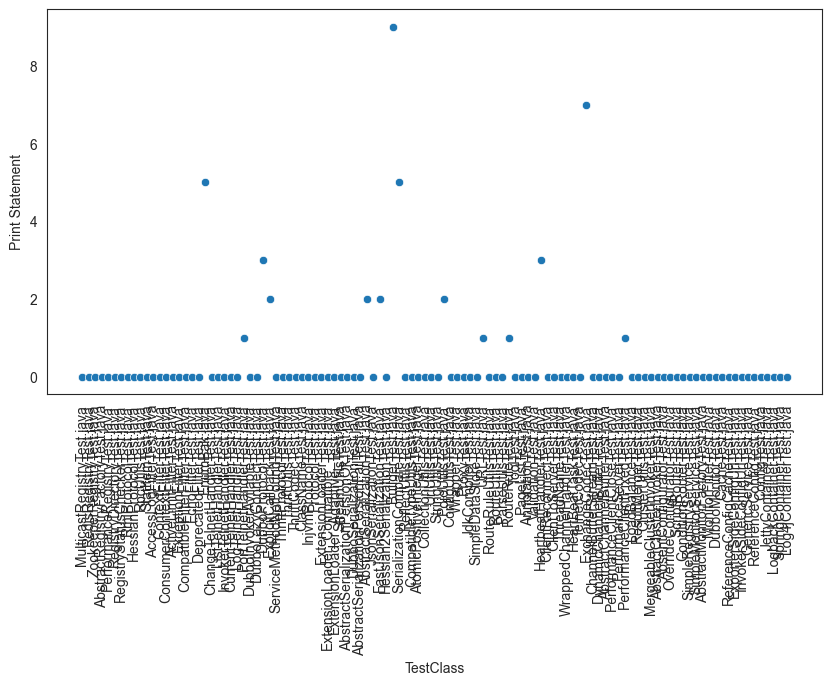

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


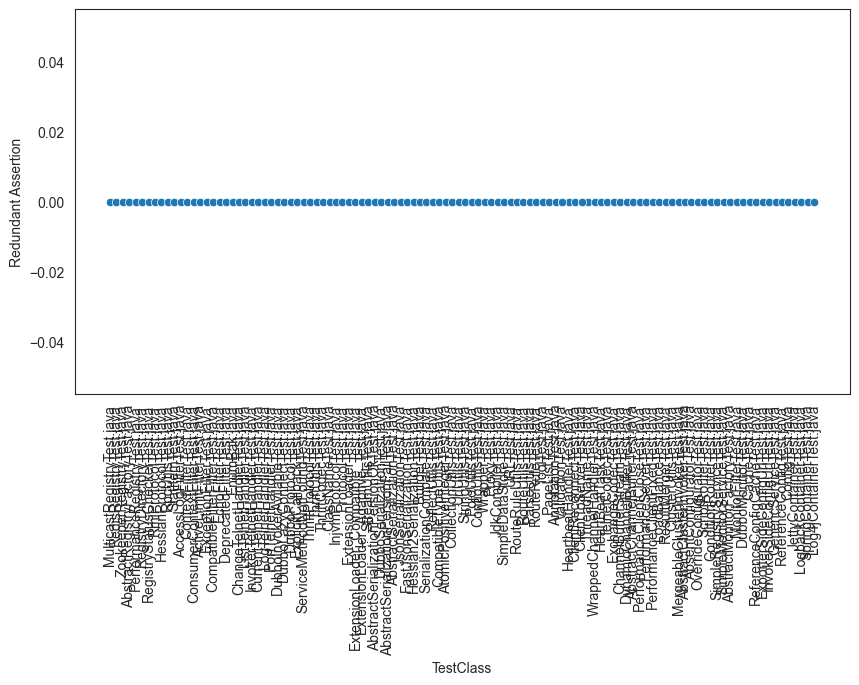

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


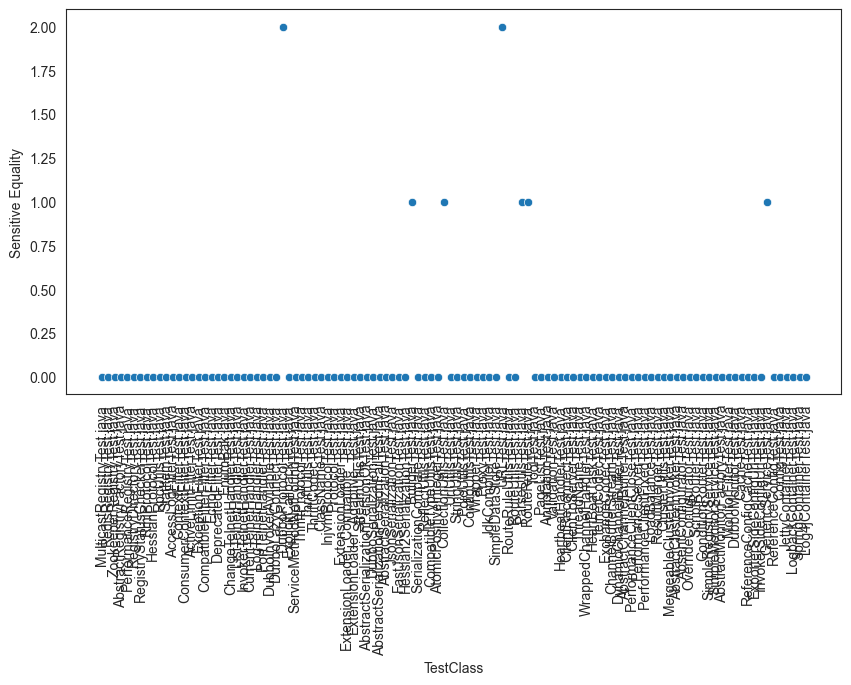

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


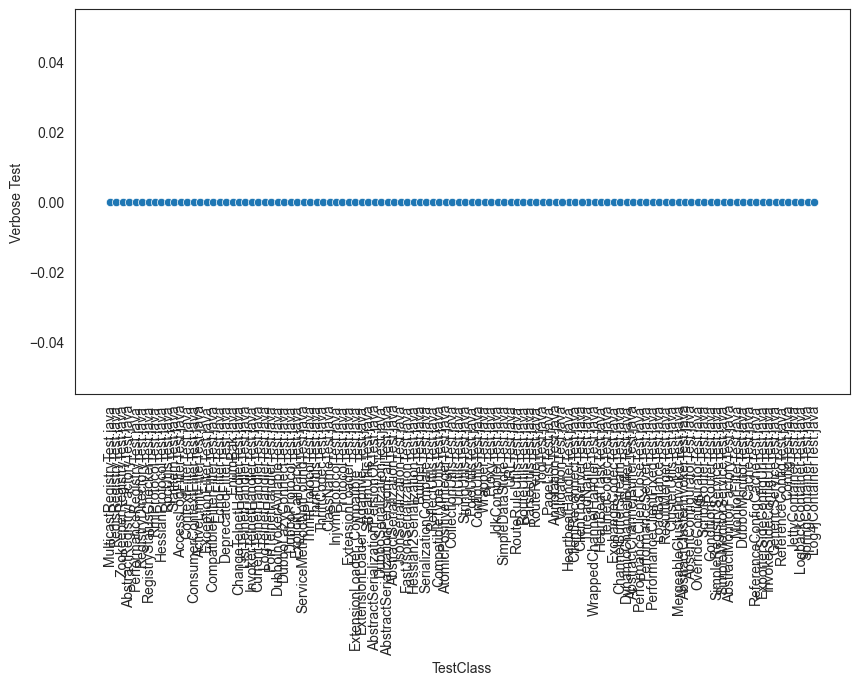

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


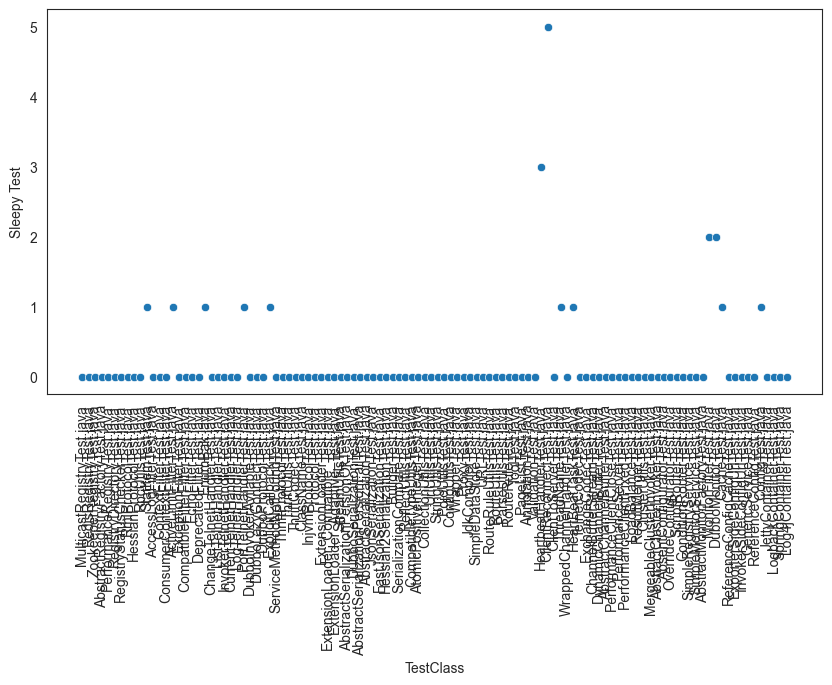

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


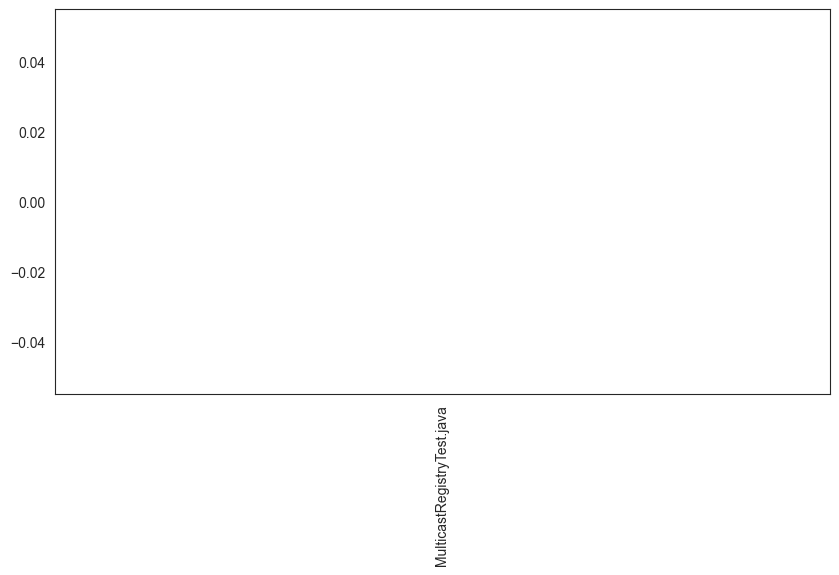

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


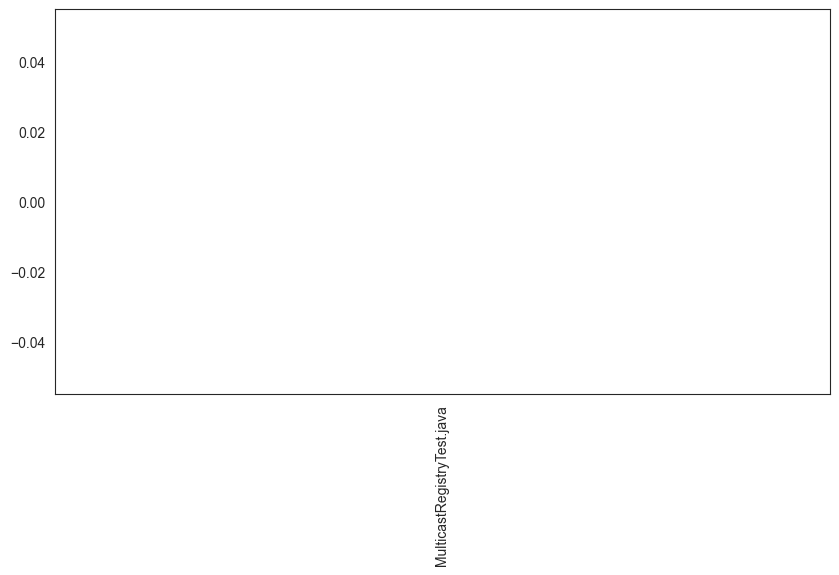

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


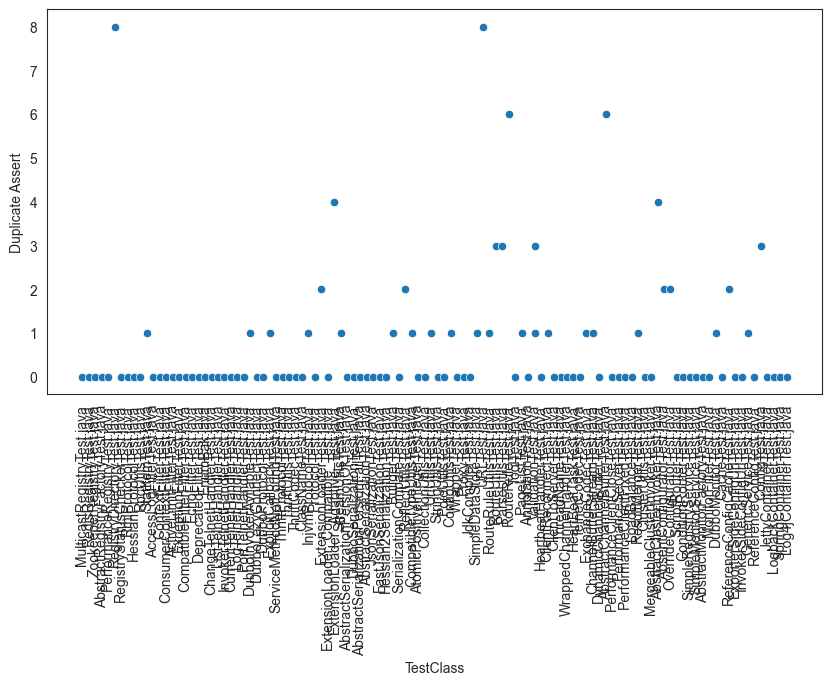

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


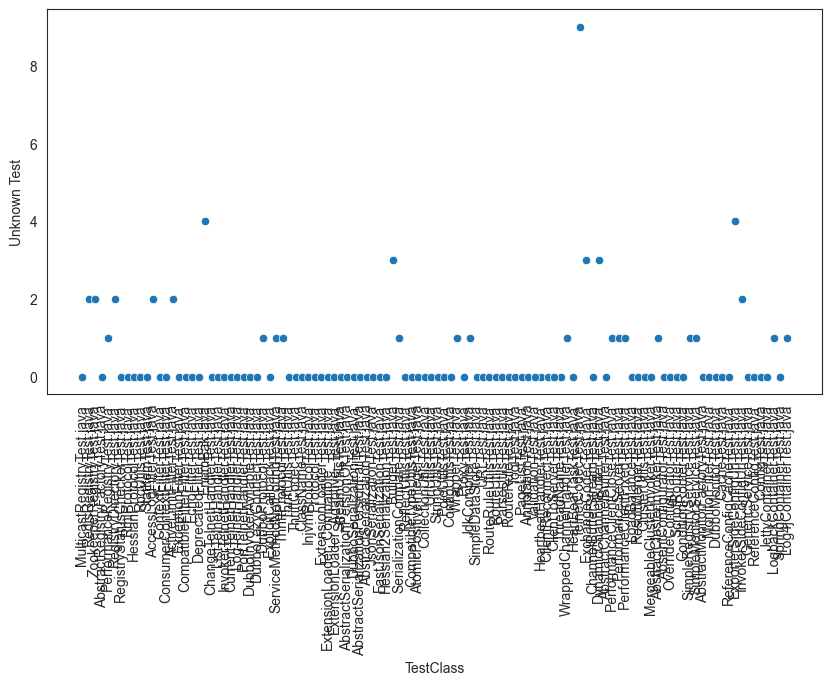

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


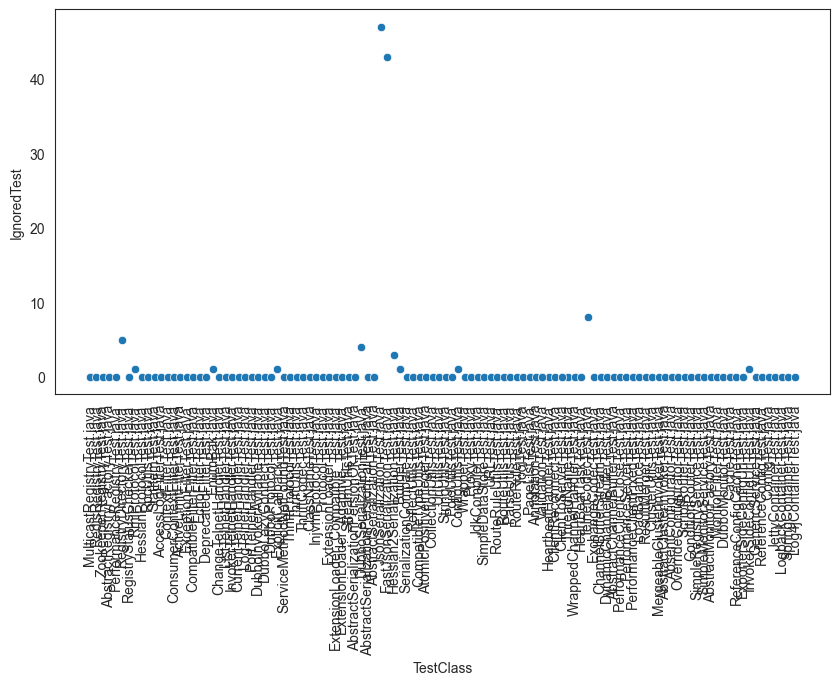

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


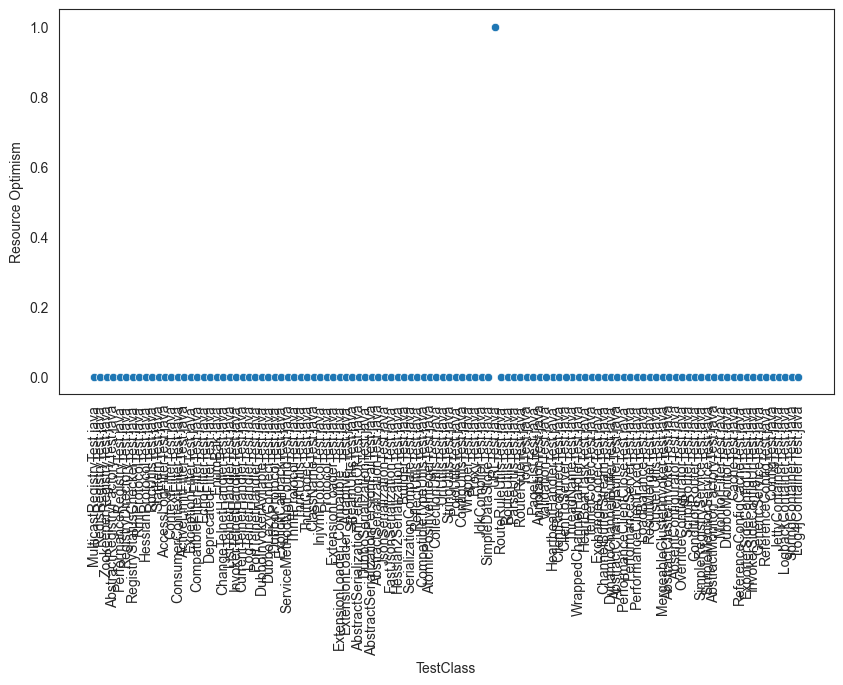

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


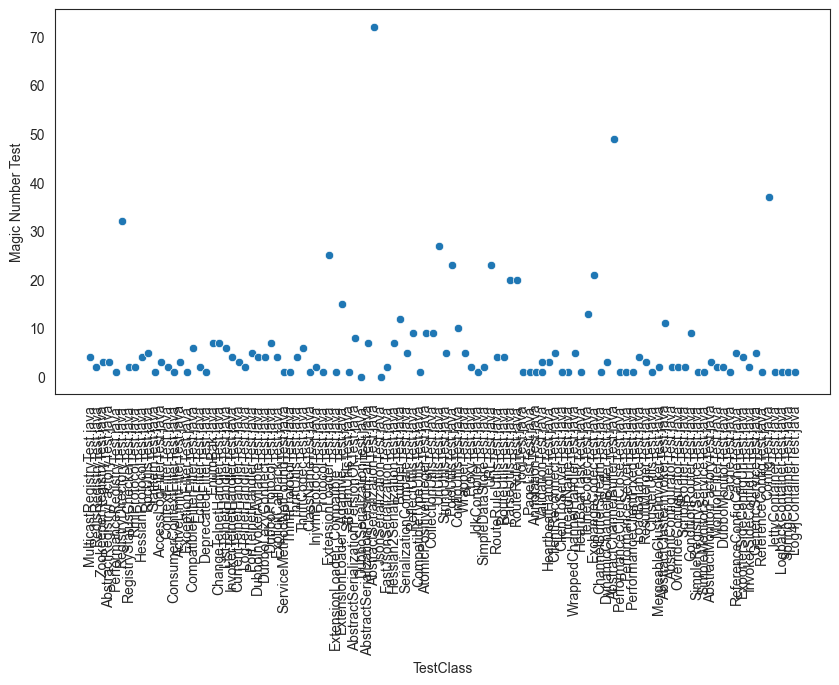

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_3756/770045201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


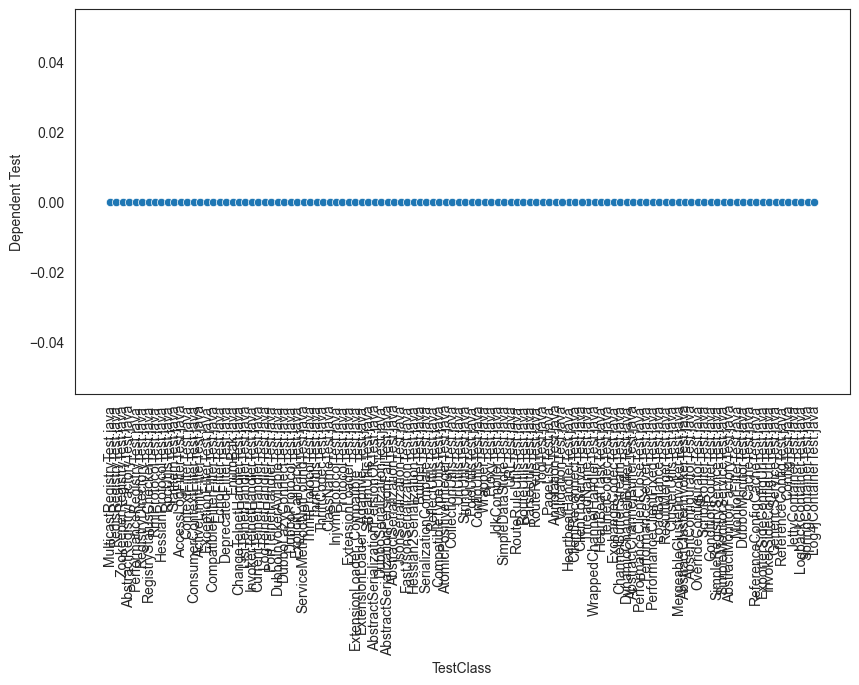

In [64]:
for i in enumerate(feature):
    test_smell_show_inEachClass(i[1])

KeyError: "['Test_Smell'] not in index"

<Figure size 1000x700 with 0 Axes>

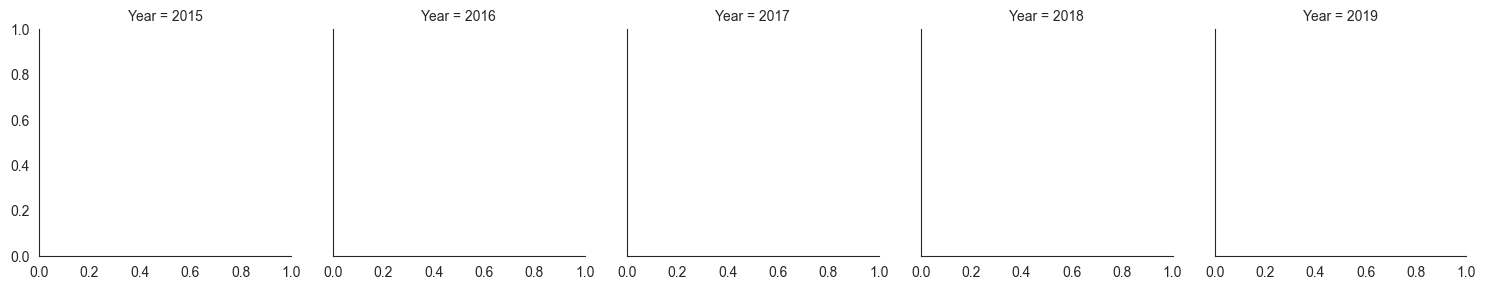

In [65]:
plt.figure(figsize=(10, 7))
g = sns.FacetGrid(all_list_hive_total, col="Year")
g.map(sns.scatterplot, 'Test_Smell', 'Amount')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [ ]:
plt.figure(figsize= (15,30))
for i in enumerate(feature):
    sns.relplot(data=all_list_hive_total, x='Year', y=i[1])